Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier, LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sample_data/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


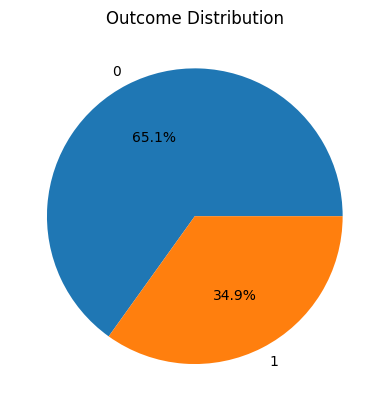

In [9]:
outcome_count = df['Outcome'].value_counts()

plt.pie( outcome_count.values, labels=outcome_count.index, autopct='%1.1f%%')
plt.title('Outcome Distribution')
plt.show()

In [10]:
new_df = df.copy()

In [11]:
new_df.drop( 'Outcome', axis = 1, inplace = True)

In [12]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
new_df.shape

(768, 8)

In [14]:
df_columns = new_df.columns
df_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [15]:
def display_plot( columns, dataframe, plot_type, x_axis ):
  no_col = 2
  no_row = int(np.ceil(len(df_columns)/no_col))
  fig, axs = plt.subplots( no_row, no_col, figsize = (20, 20))

  for i, col in enumerate(columns):
    axis_arg = 'x' if x_axis else 'y'
    plot_type(data=dataframe, **{axis_arg: col}, ax=axs[i // no_col, i % no_col])
    axs[i//no_col, i%no_col].set_title(f'{col} Distribution')
    axs[i//no_col, i%no_col].set_xlabel(col)
    axs[i//no_col, i%no_col].set_ylabel('Count')

  plt.tight_layout()
  plt.show()

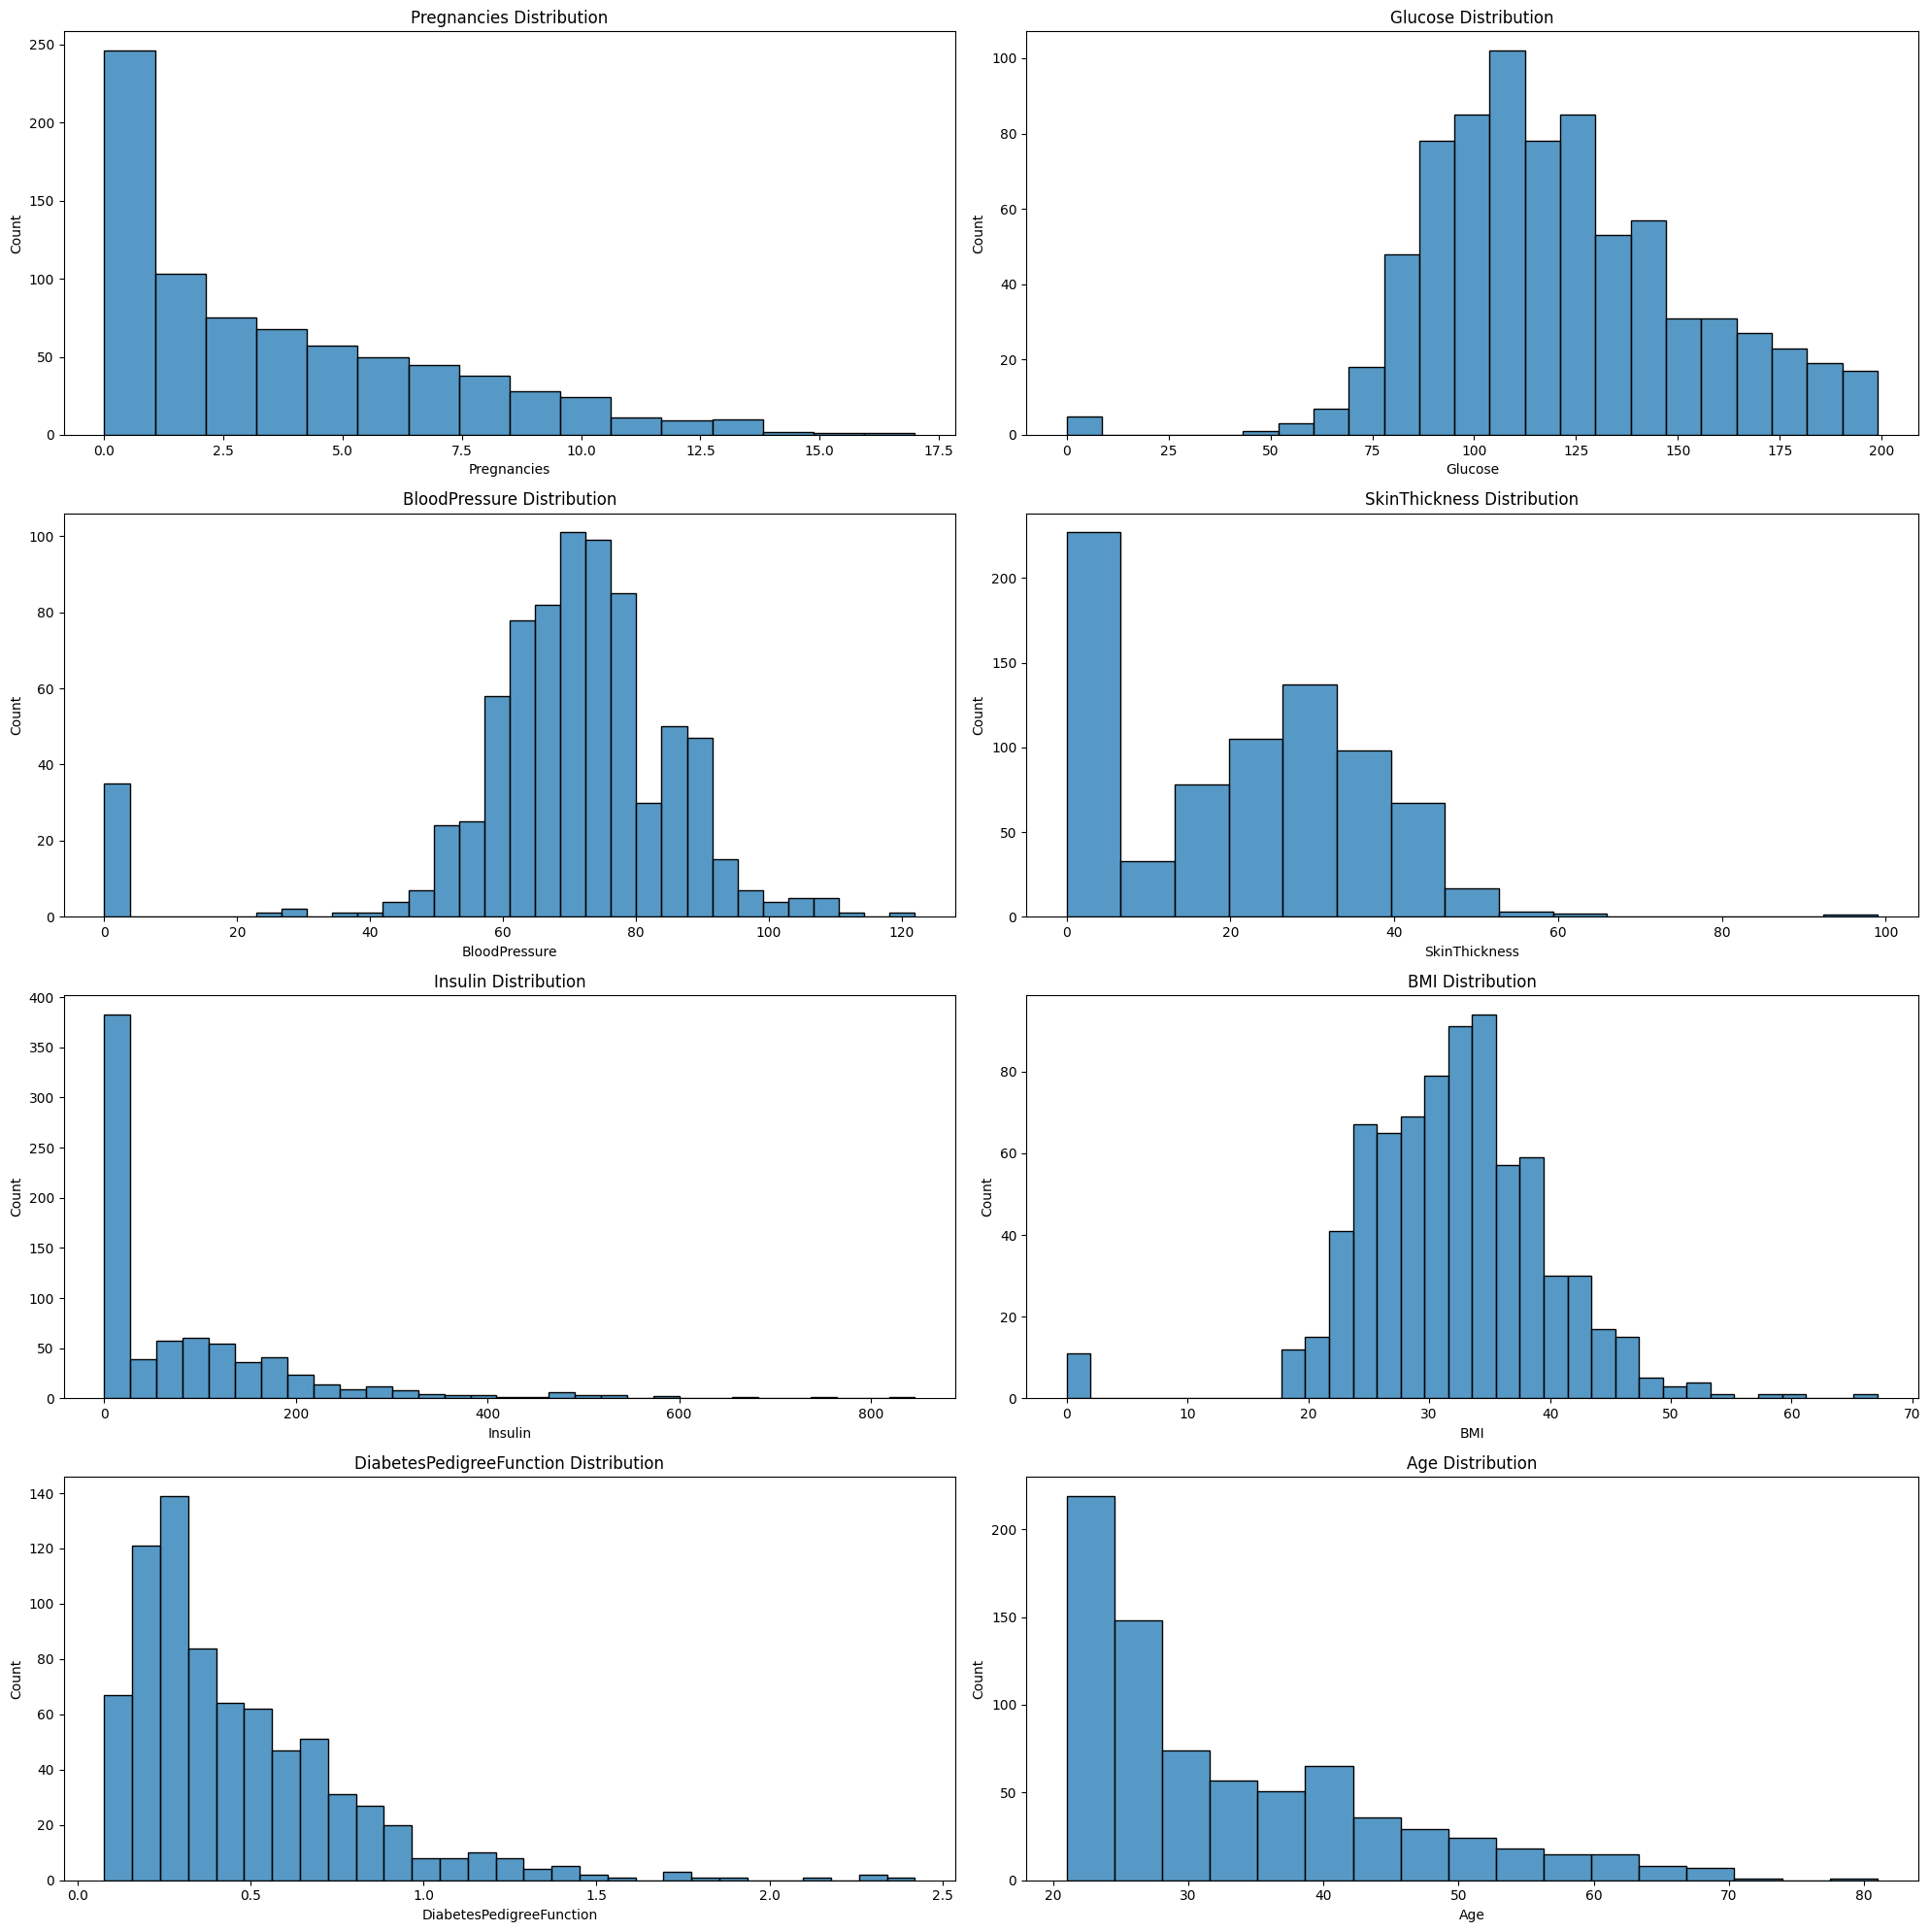

In [16]:
display_plot( df_columns, df, sns.histplot, True )

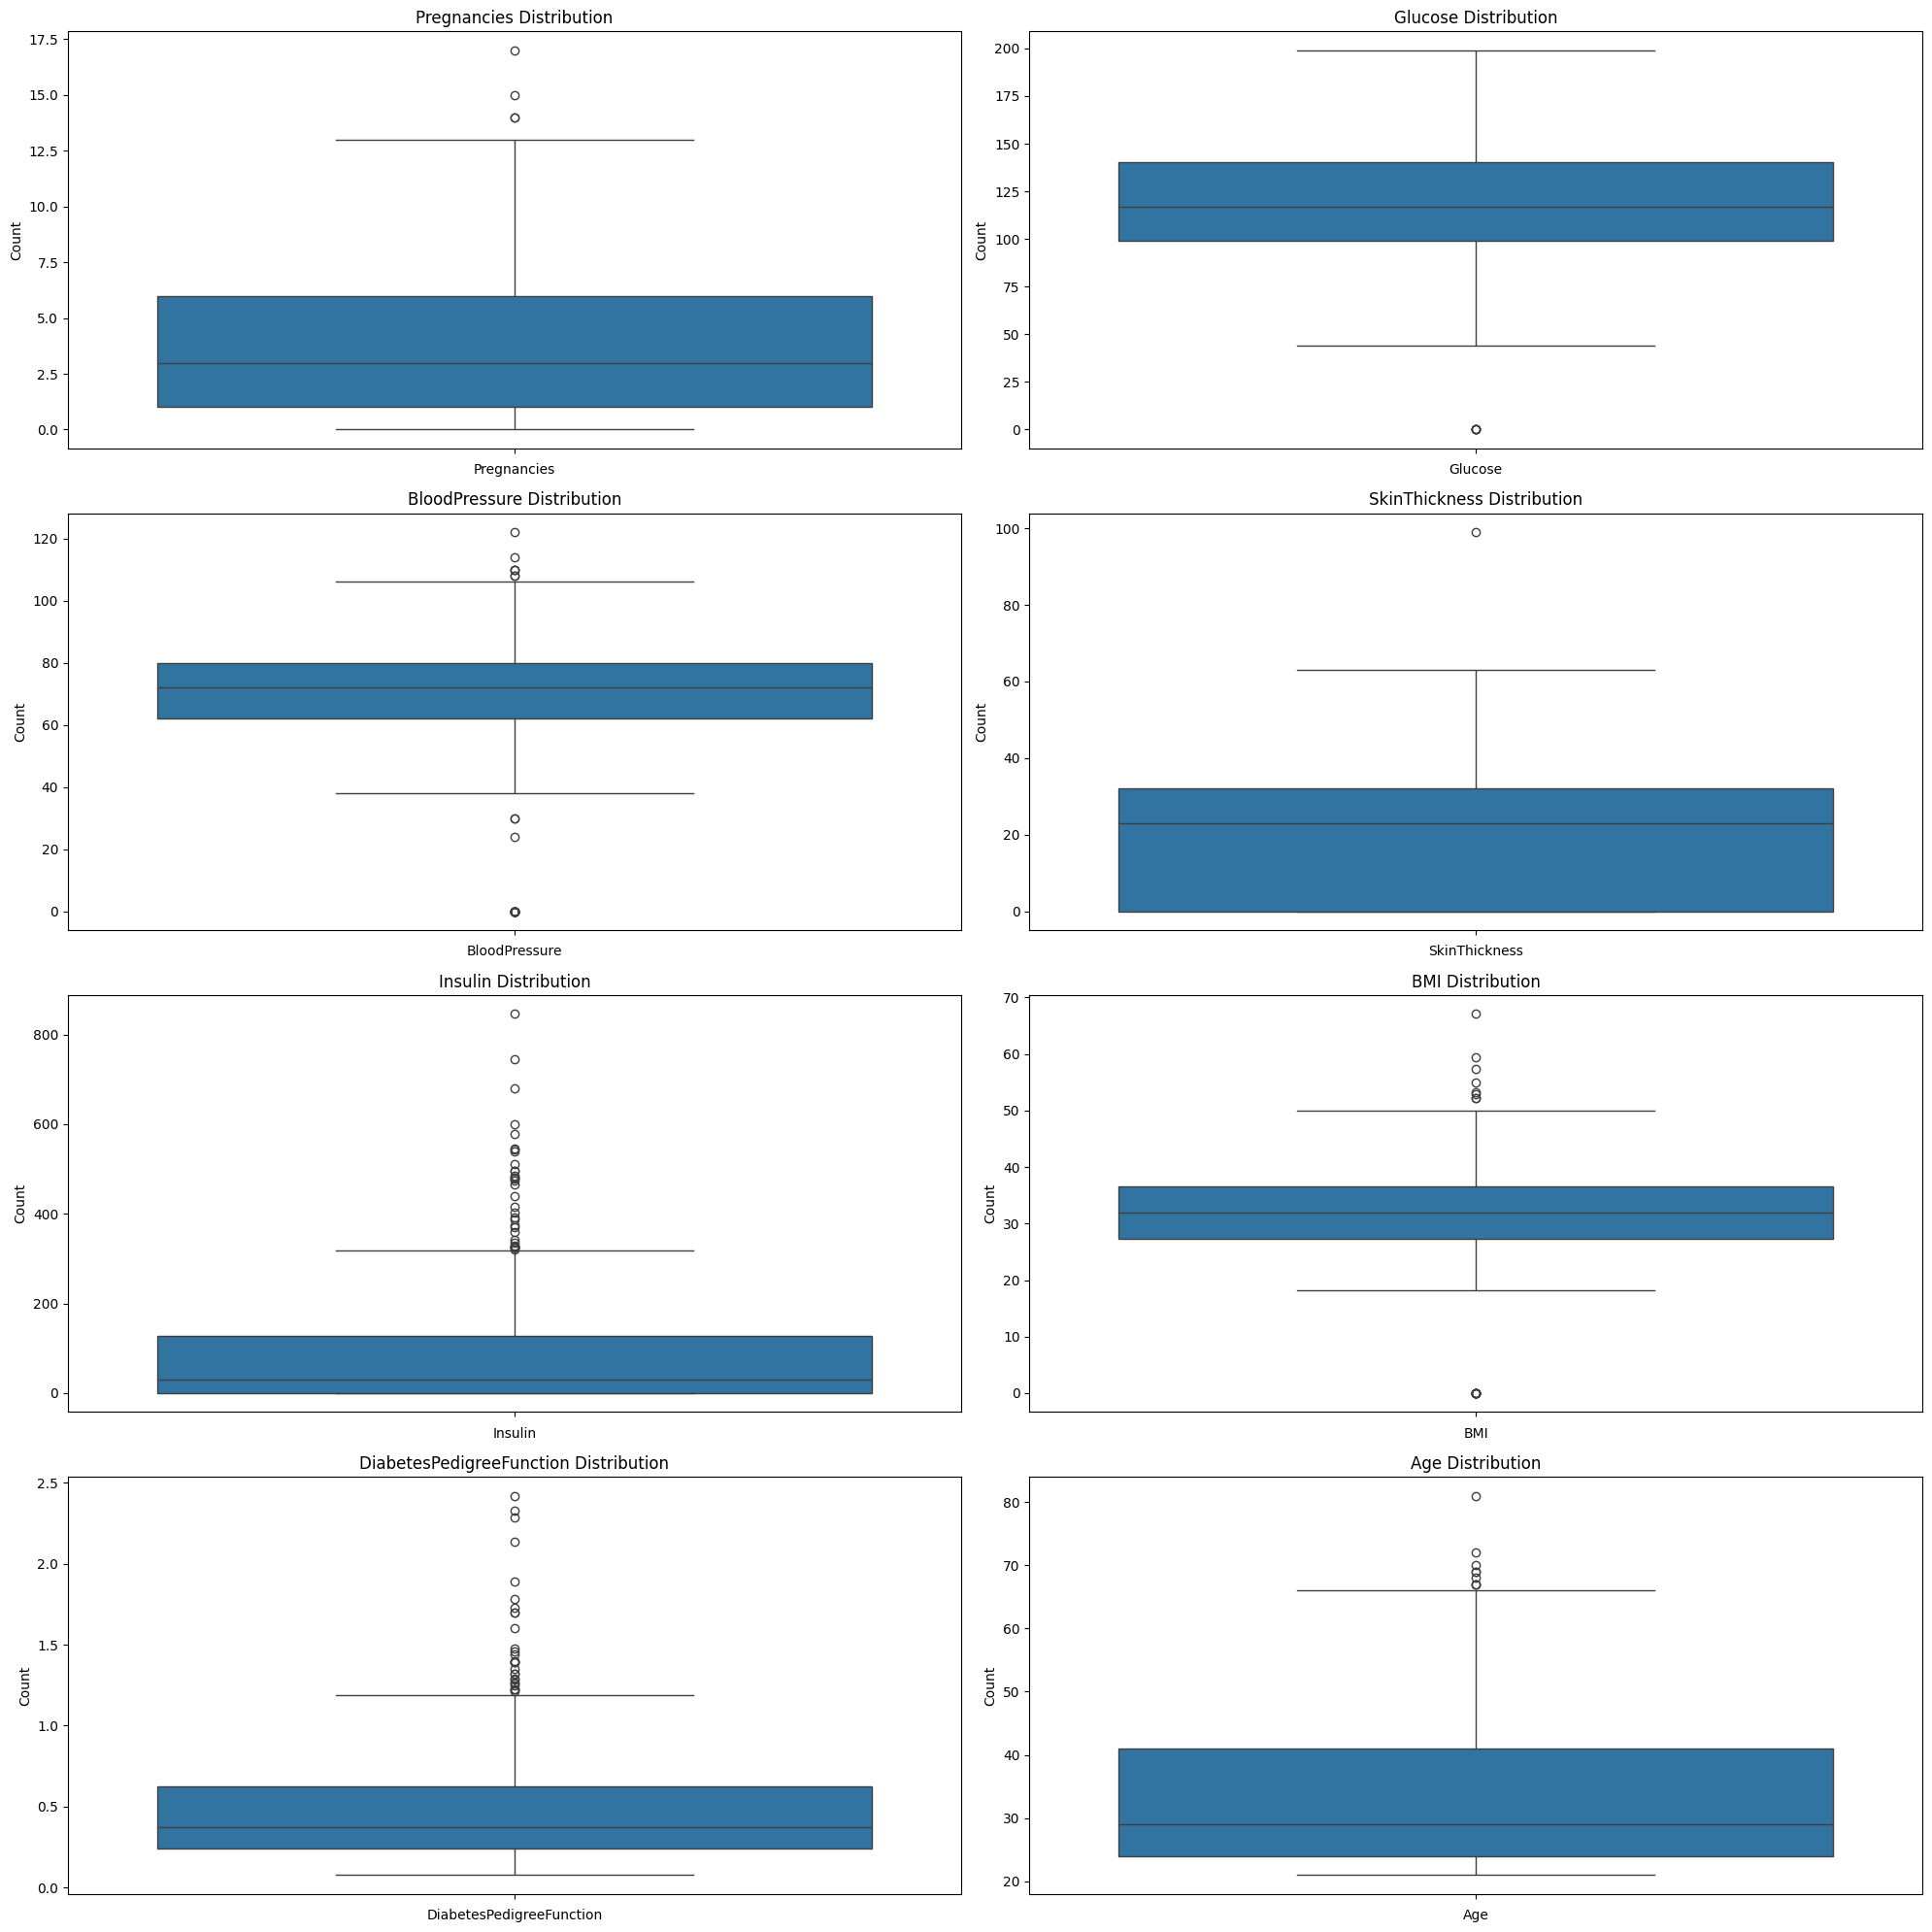

In [17]:
display_plot( df_columns, df, sns.boxplot, False )

In [18]:
Q1 = new_df.quantile(0.25)
Q1

,0.25
Pregnancies,1.00000
Glucose,99.00000
BloodPressure,62.00000
SkinThickness,0.00000
Insulin,0.00000
BMI,27.30000
DiabetesPedigreeFunction,0.24375
Age,24.00000


In [19]:
Q3 = new_df.quantile(0.75)
Q3

,0.75
Pregnancies,6.00000
Glucose,140.25000
BloodPressure,80.00000
SkinThickness,32.00000
Insulin,127.25000
BMI,36.60000
DiabetesPedigreeFunction,0.62625
Age,41.00000


In [20]:
IQR = Q3 - Q1
IQR

,0
Pregnancies,5.0000
Glucose,41.2500
BloodPressure,18.0000
SkinThickness,32.0000
Insulin,127.2500
BMI,9.3000
DiabetesPedigreeFunction,0.3825
Age,17.0000


In [21]:
lower_bound = Q1 - 1.5 * IQR
lower_bound

,0
Pregnancies,-6.500
Glucose,37.125
BloodPressure,35.000
SkinThickness,-48.000
Insulin,-190.875
BMI,13.350
DiabetesPedigreeFunction,-0.330
Age,-1.500


In [22]:
upper_bound = Q3 + 1.5 * IQR
upper_bound

,0
Pregnancies,13.500
Glucose,202.125
BloodPressure,107.000
SkinThickness,80.000
Insulin,318.125
BMI,50.550
DiabetesPedigreeFunction,1.200
Age,66.500


In [23]:
outlier_mask = (new_df > upper_bound) | (new_df < lower_bound)
outlier_count = outlier_mask.any(axis=1).sum()

outlier_count

129

In [24]:
winsorized_df = new_df.clip( lower=lower_bound, upper=upper_bound, axis=1 )
winsorized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0


In [25]:
winsorized_df.shape

(768, 8)

In [26]:
winsorized_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000


In [27]:
def display_before_after_plot( columns, dataframes, plot_type, method, x_axis ):
  for i, col in enumerate( columns ):
    fig, axs = plt.subplots( 1, 2, figsize = (20, 5))
    for j, dataframe in enumerate(dataframes):
      axis_arg = 'x' if x_axis else 'y'
      plot_type(data=dataframe, **{axis_arg: col}, ax=axs[ j ])
      if j == 0:
        axs[j].set_title(f'{col} Before { method }')
      else:
        axs[j].set_title(f'{col} After { method } ')

      axs[j].set_xlabel(col)
      axs[j].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

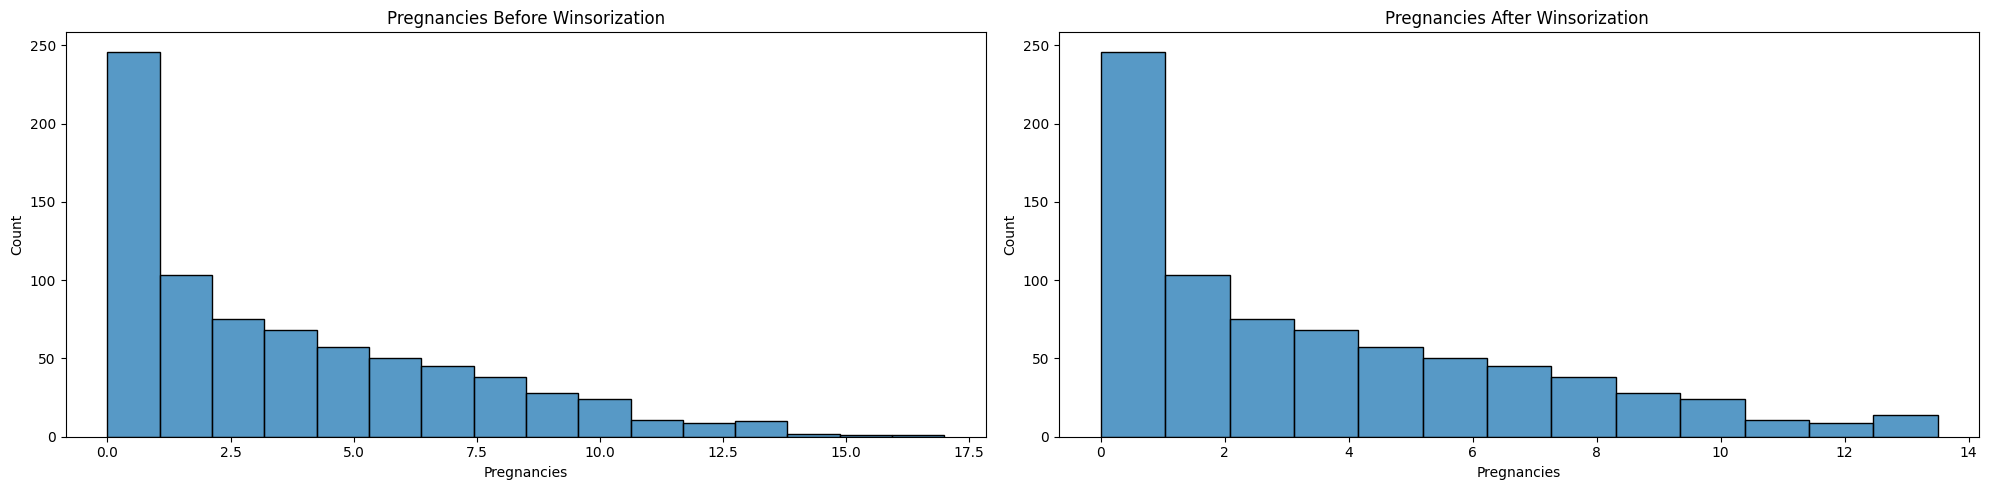

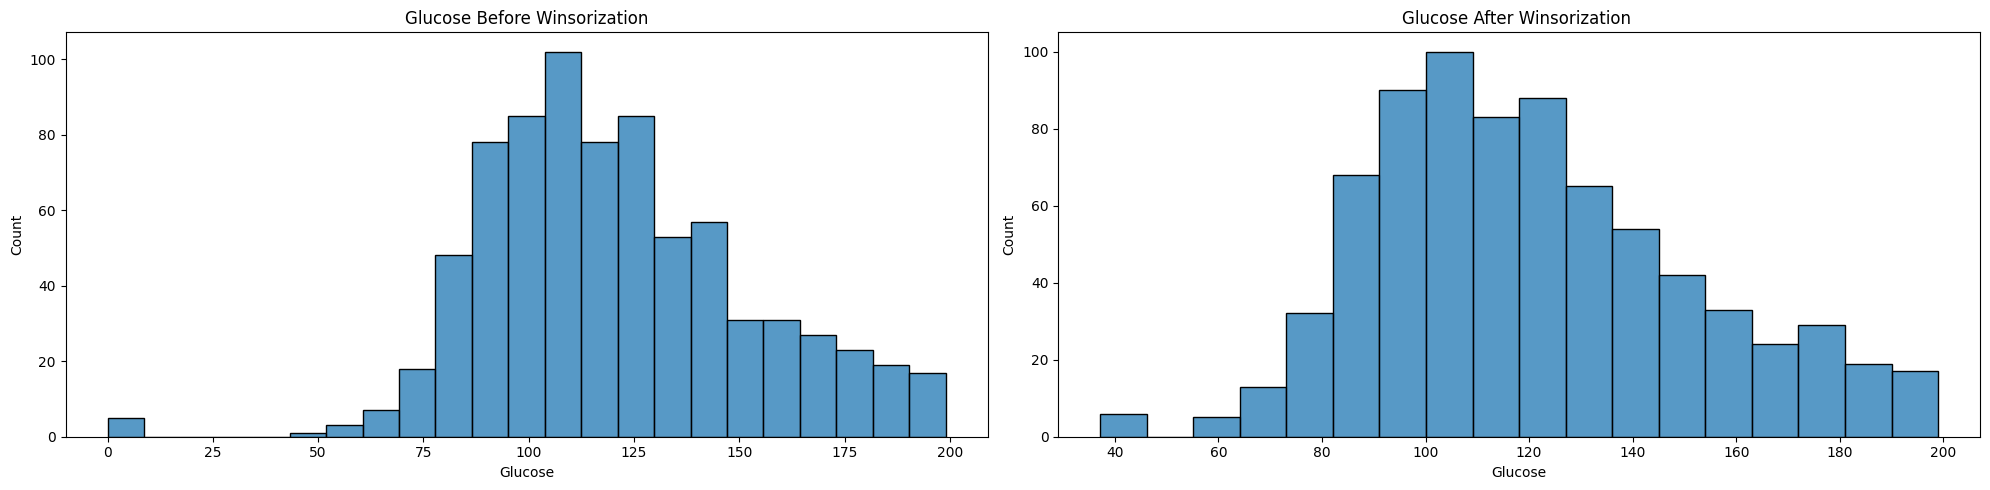

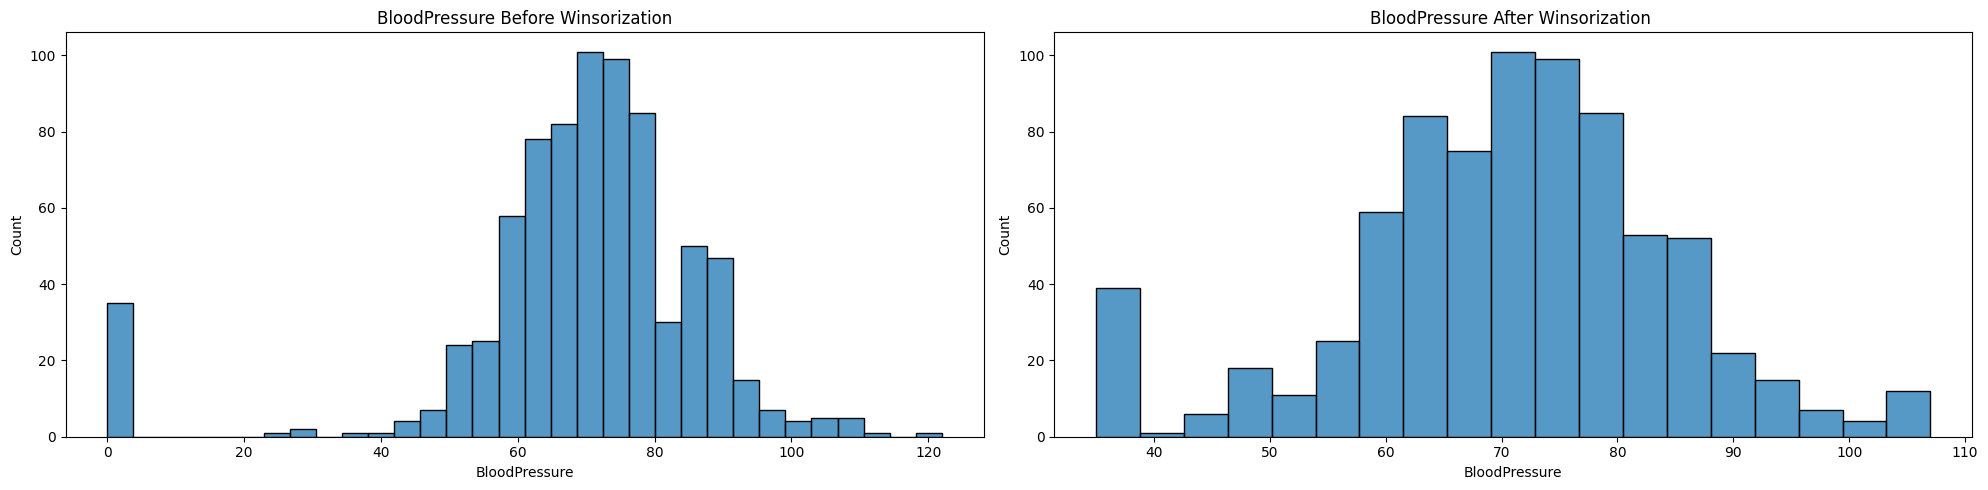

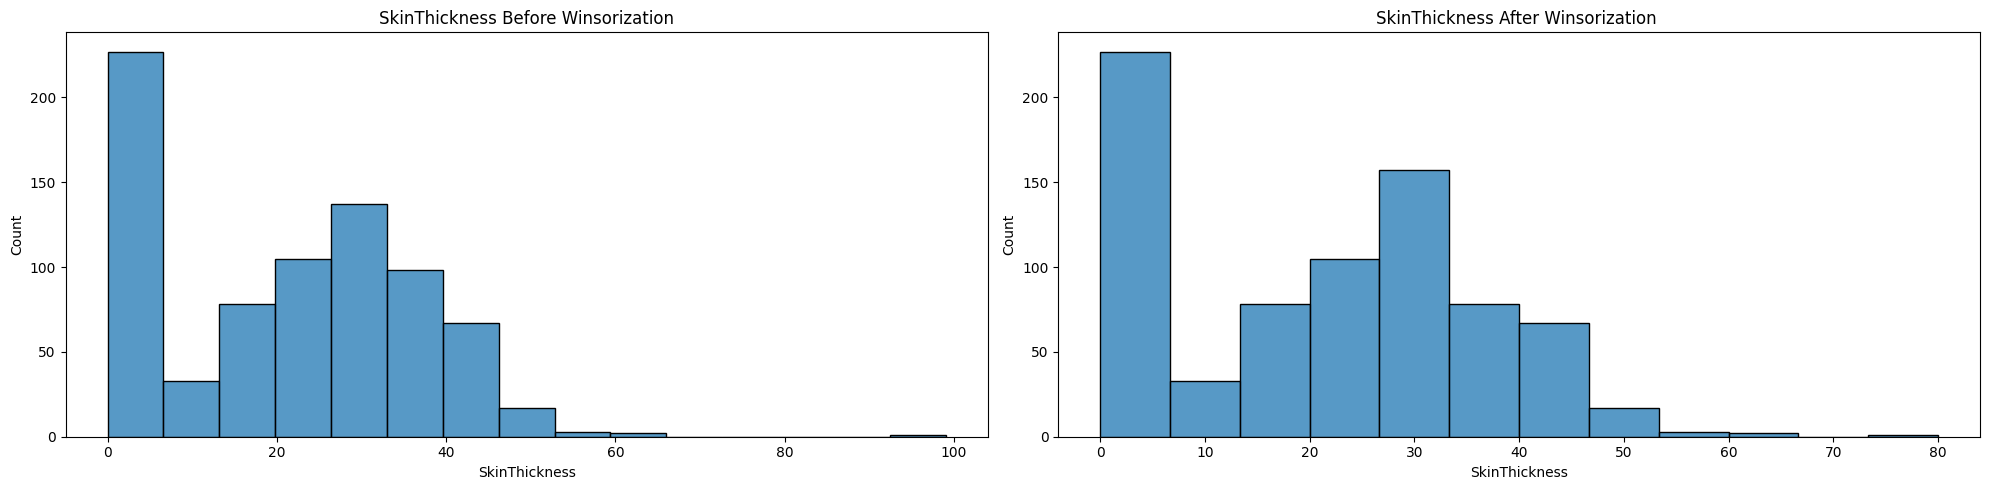

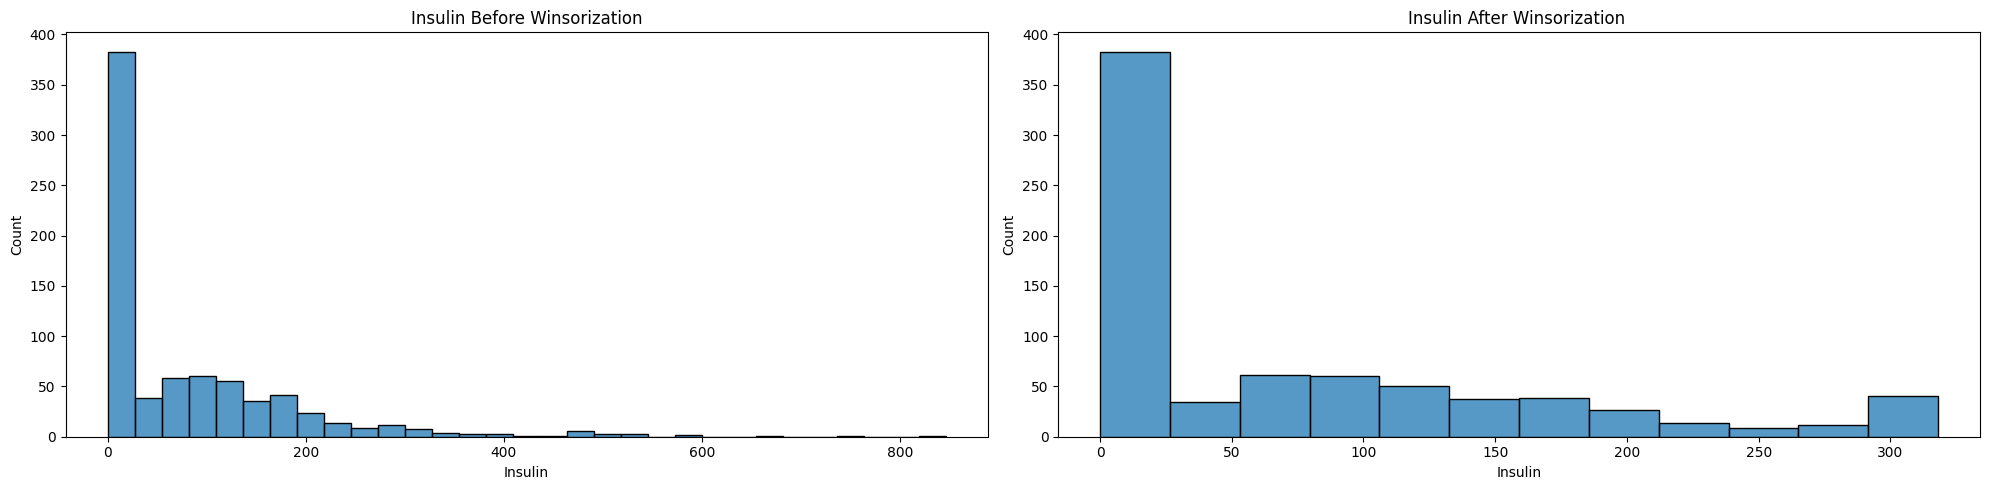

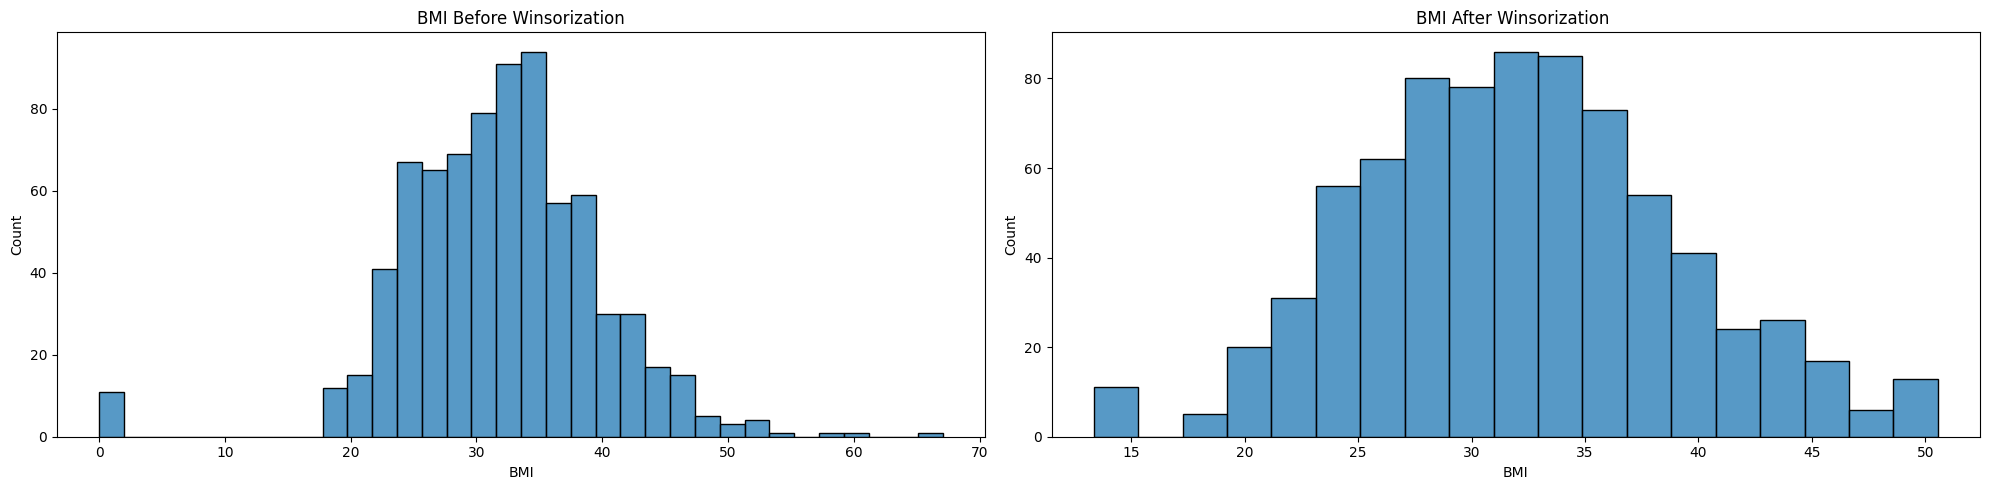

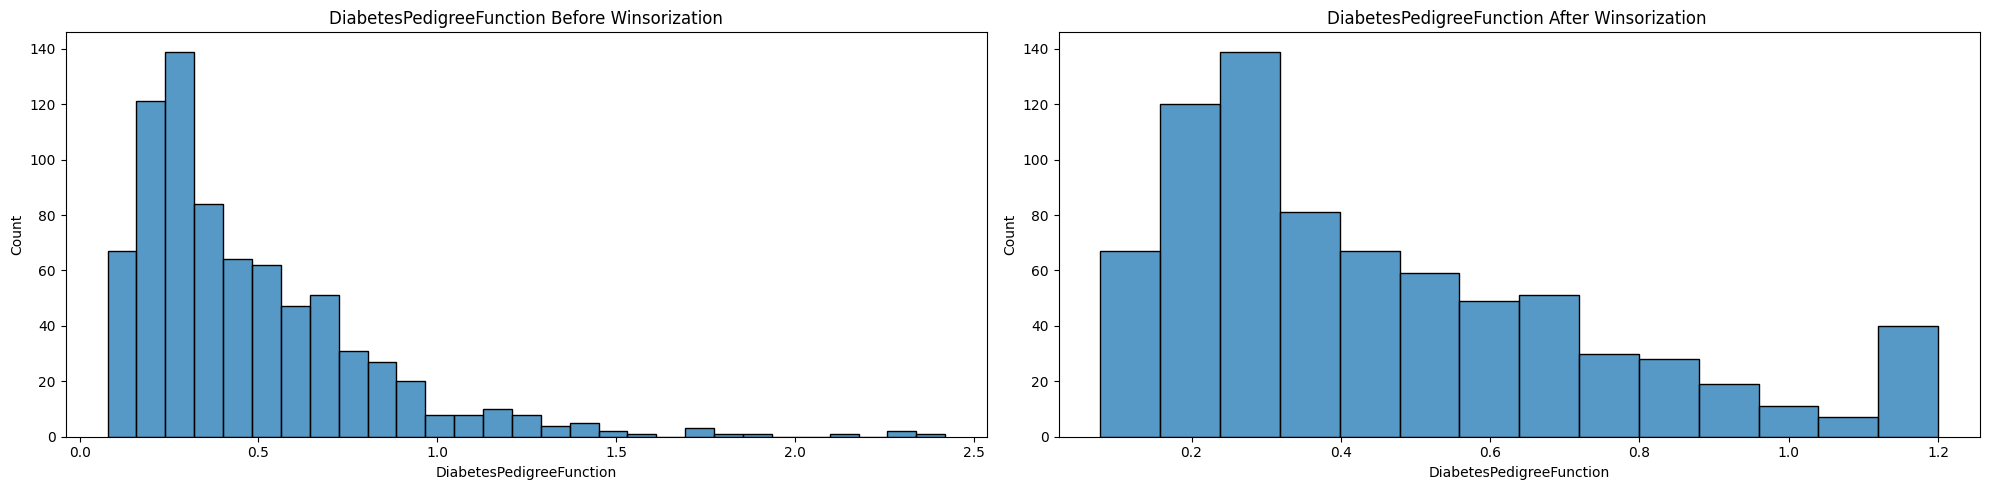

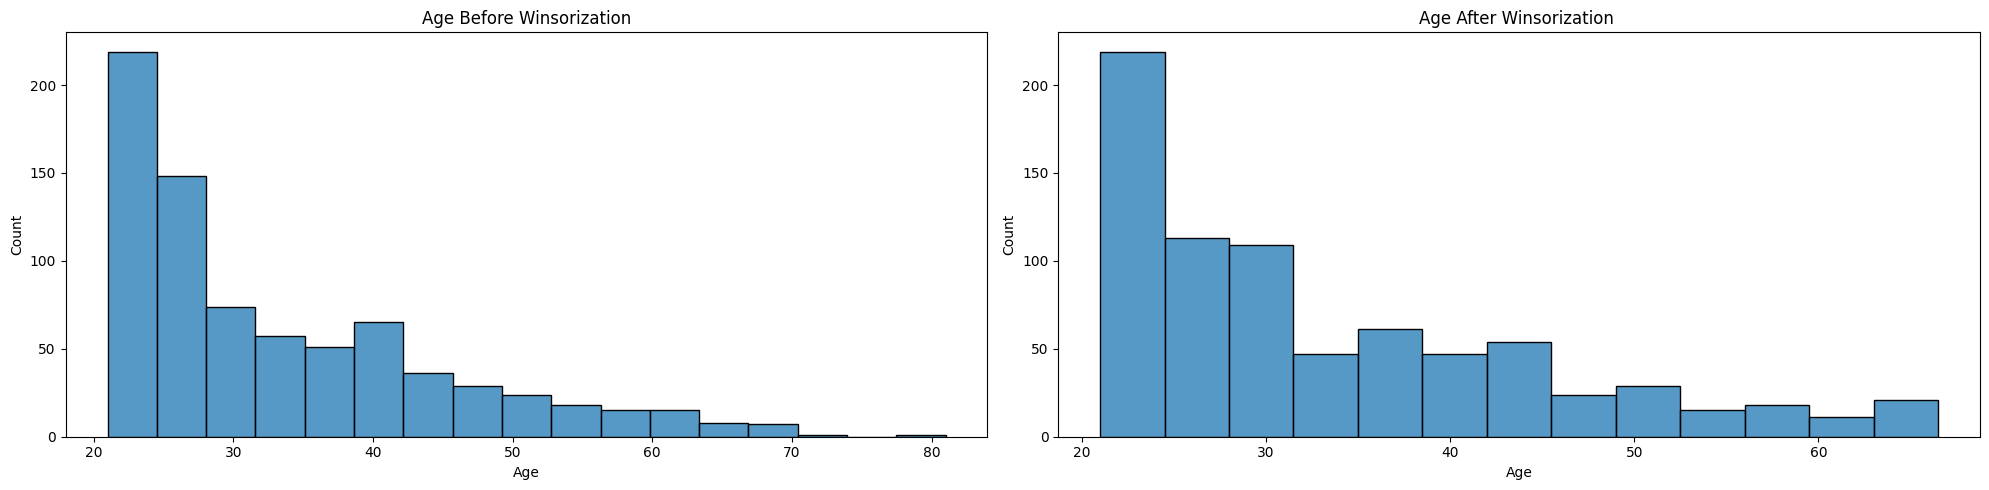

In [28]:
dataframes = [new_df, winsorized_df]
display_before_after_plot( df_columns, dataframes, sns.histplot, 'Winsorization', True )

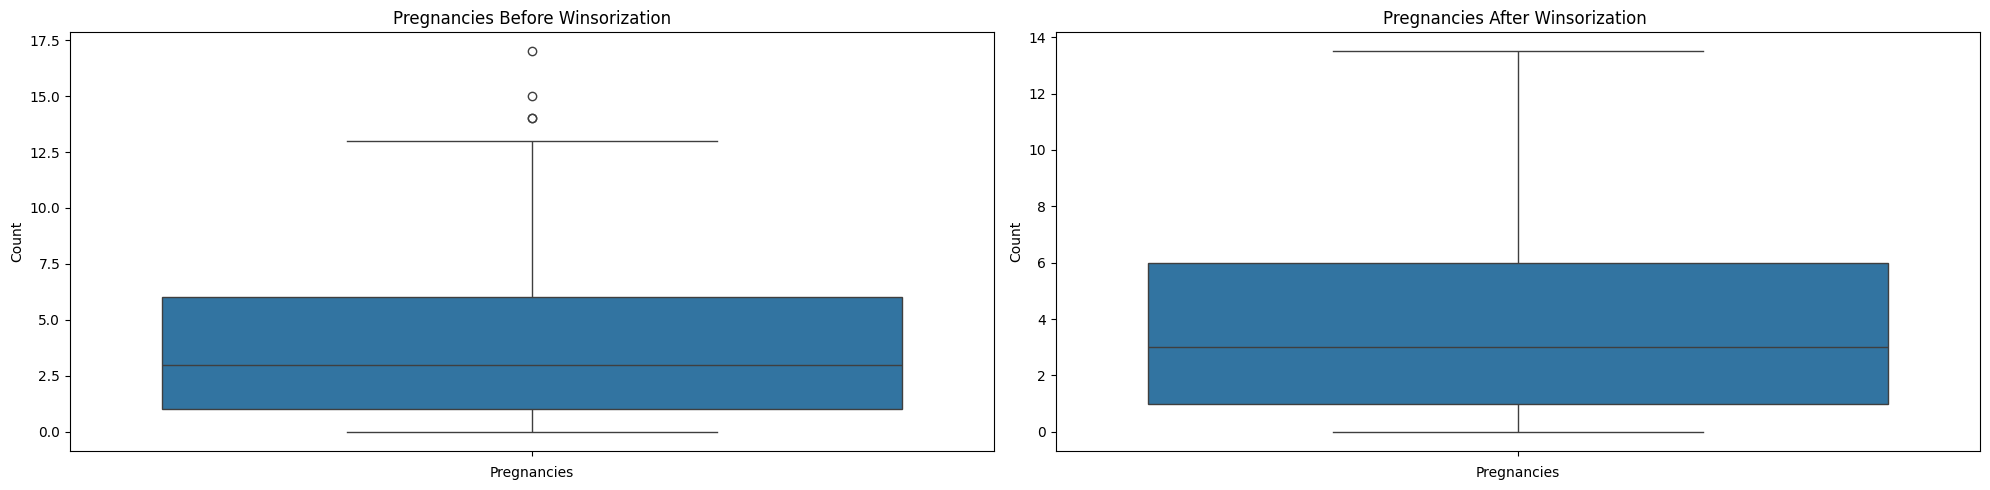

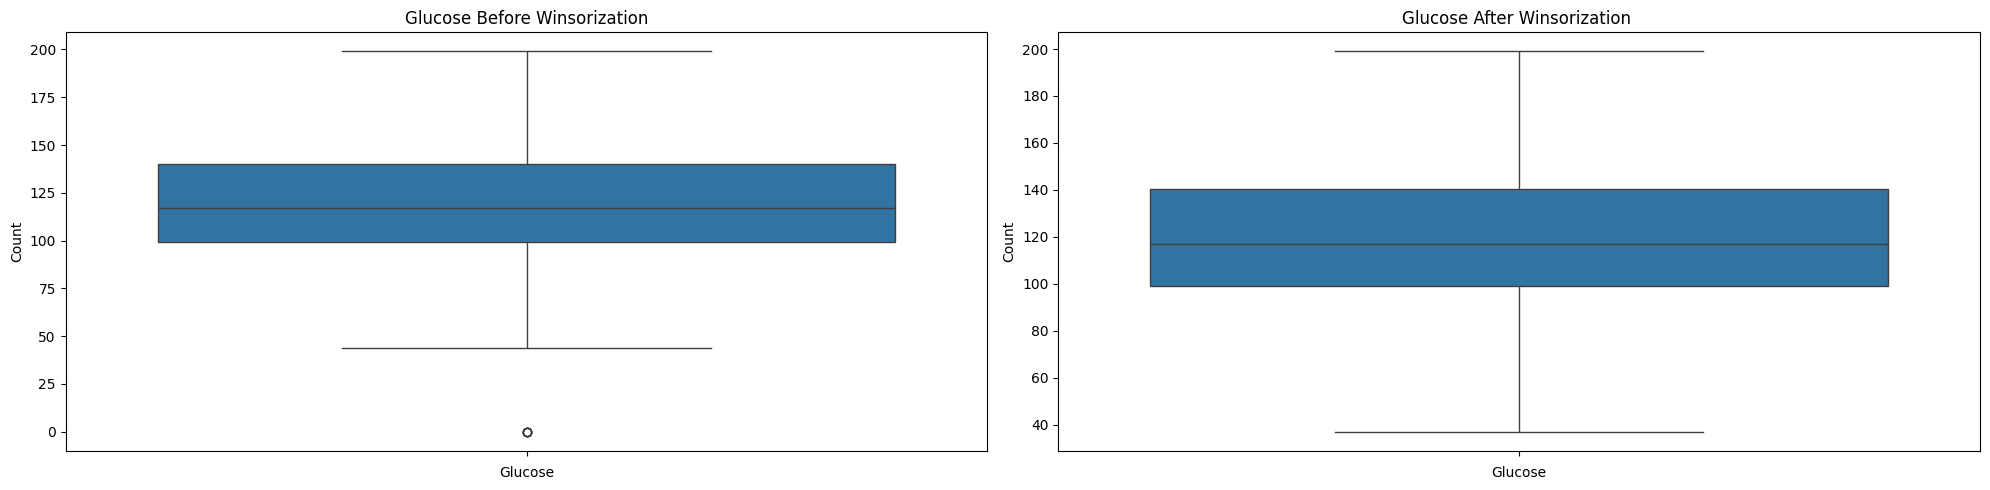

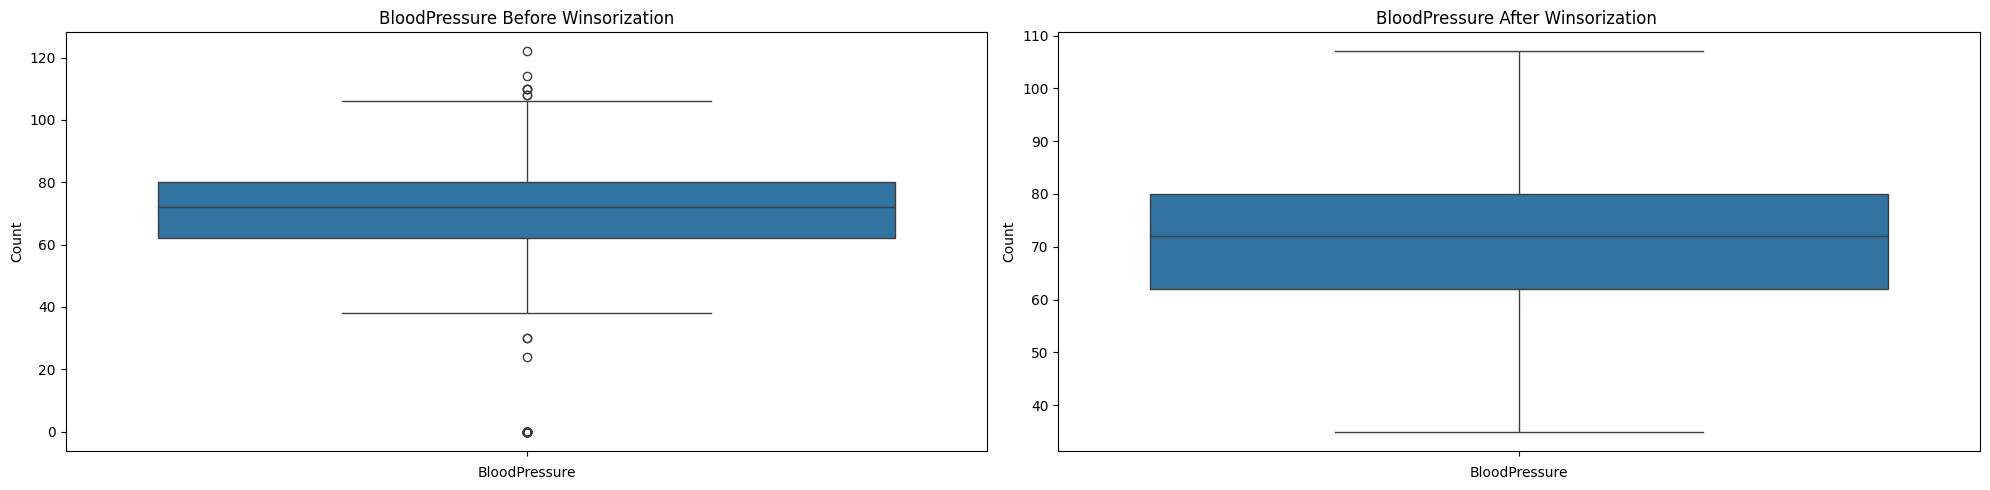

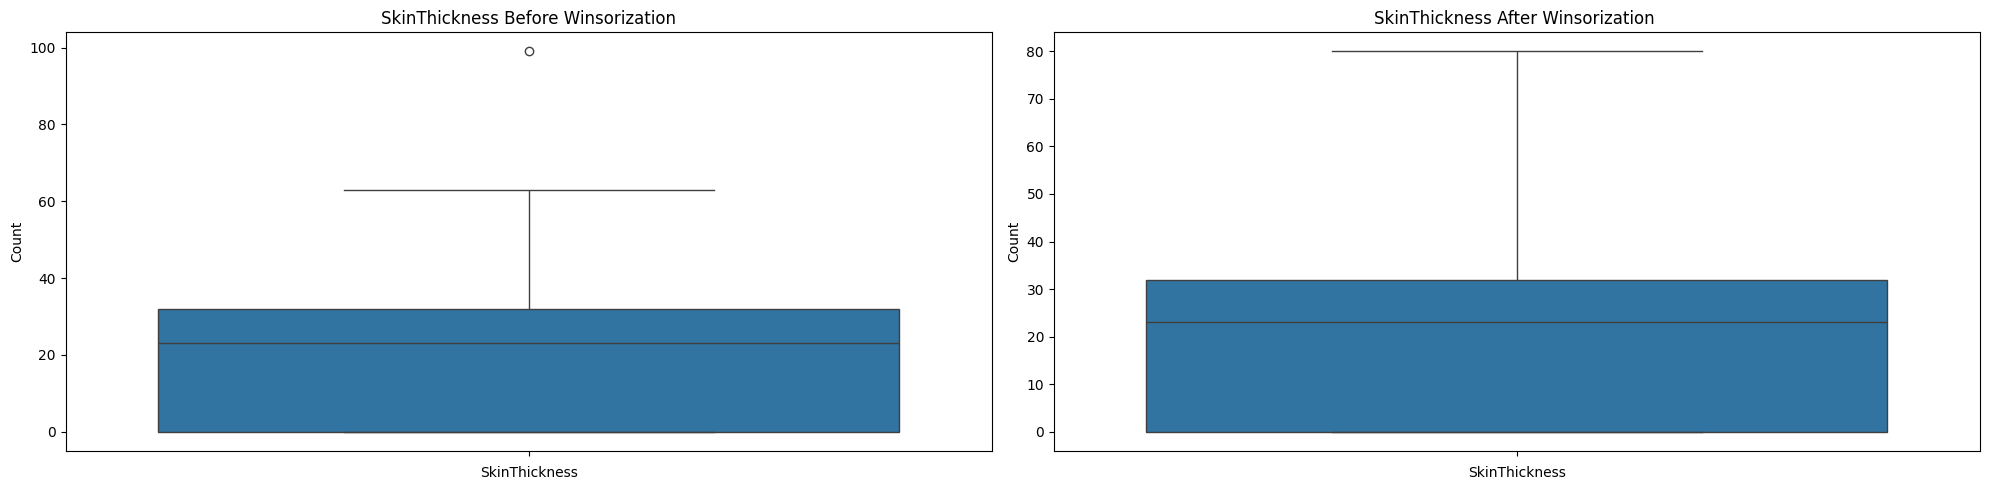

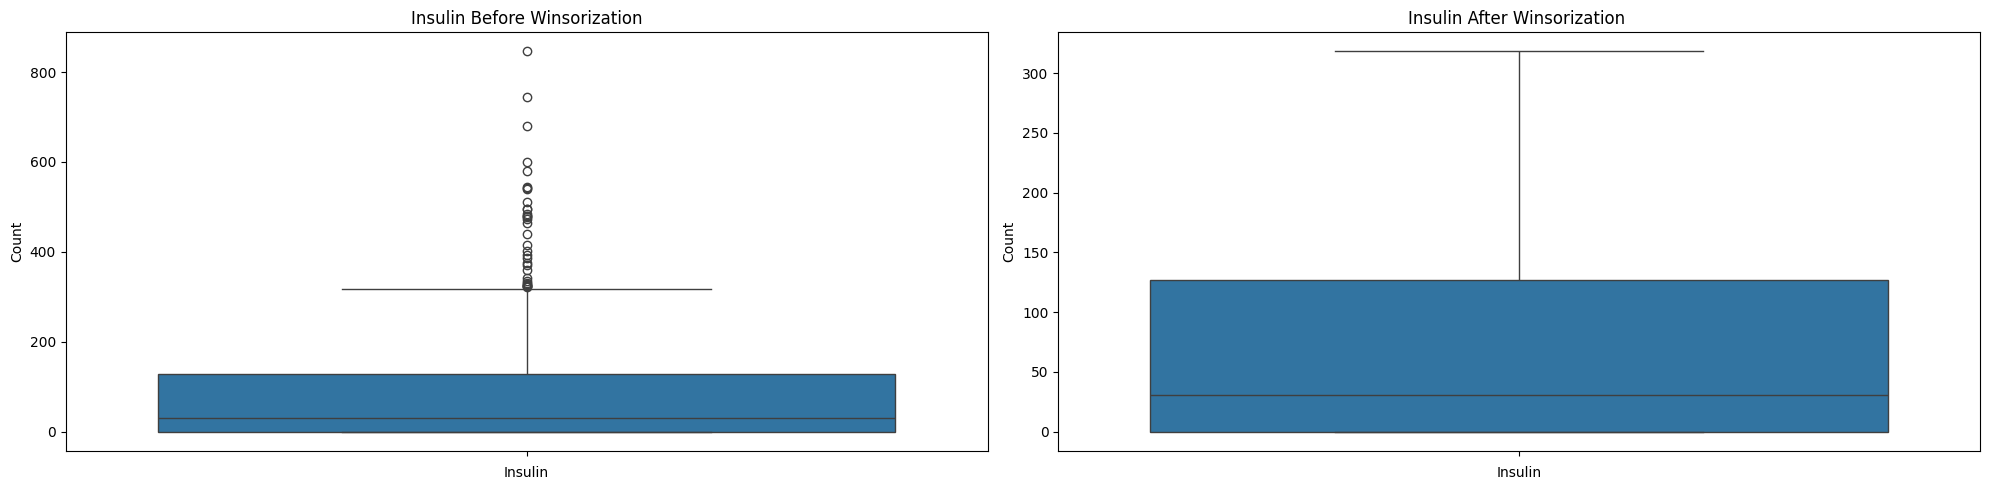

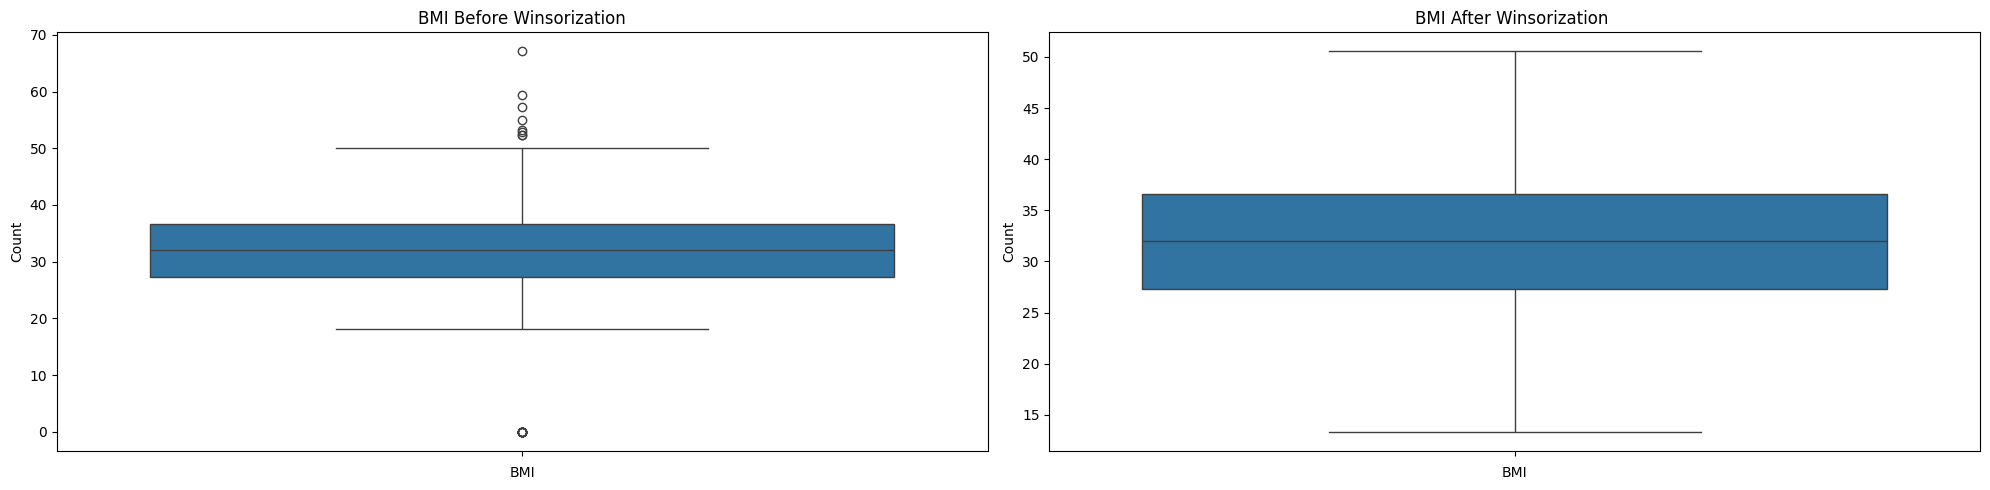

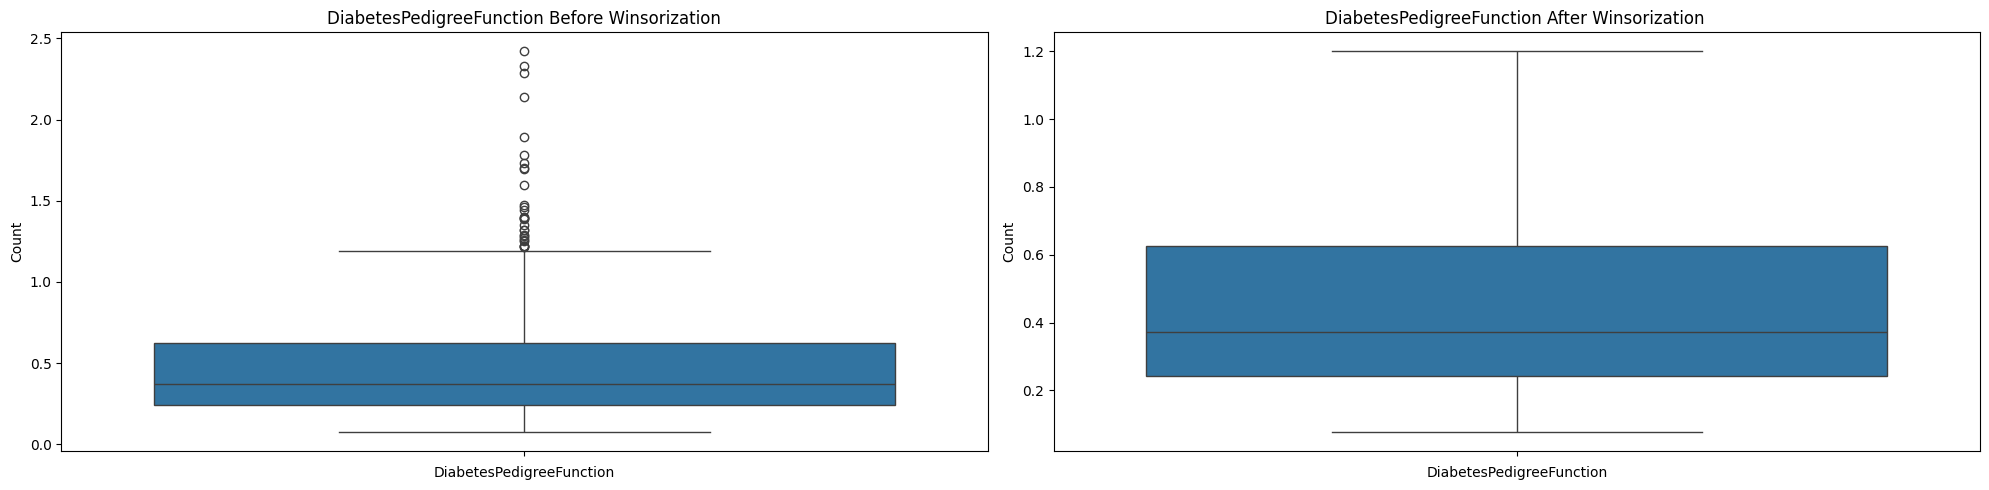

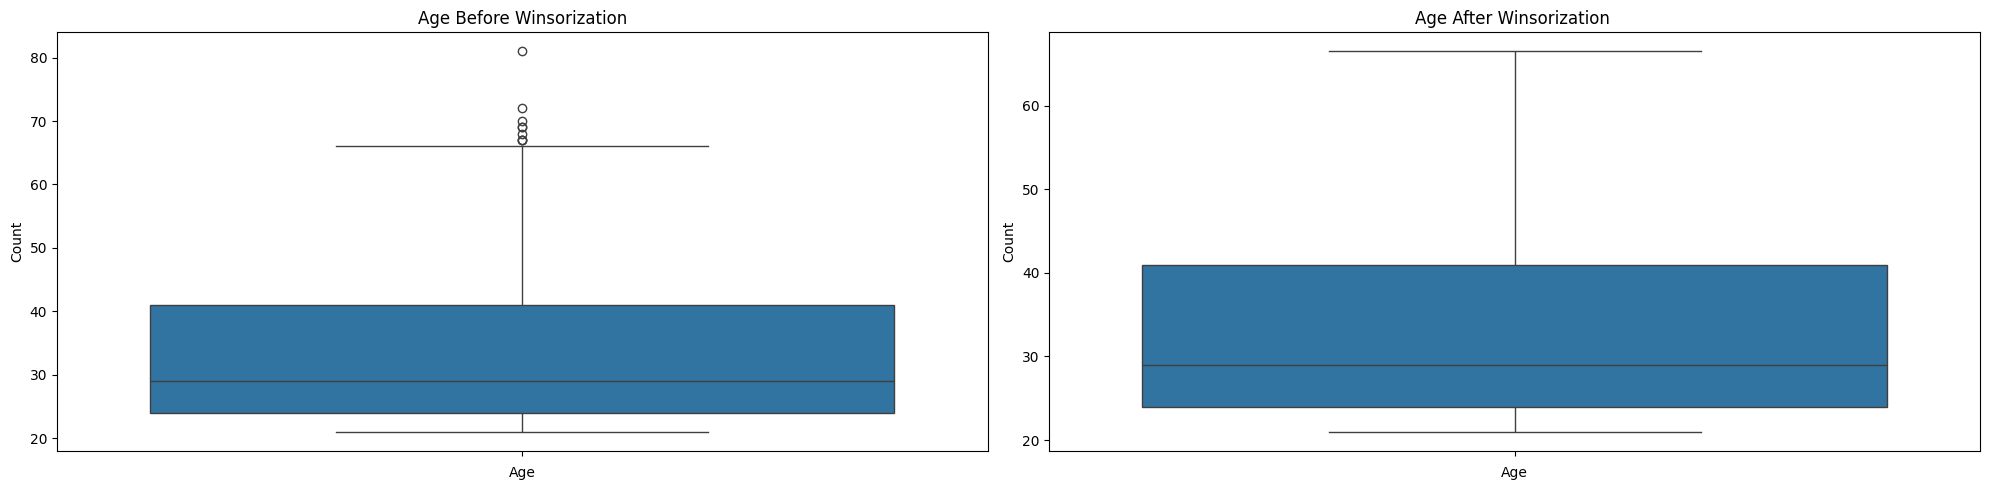

In [29]:
display_before_after_plot( df_columns, dataframes, sns.boxplot, 'Winsorization', False )

In [30]:
new_df2 = new_df[ ( ( new_df >= lower_bound ) & ( new_df <= upper_bound ) ) ]
new_df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0


In [31]:
new_df2.shape

(768, 8)

In [32]:
new_df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,764.000000,763.000000,723.000000,767.000000,734.000000,749.000000,739.000000,759.000000
mean,3.786649,121.686763,72.208852,20.434159,62.328338,32.204005,0.429832,32.805007
std,3.278714,30.535641,11.488731,15.708524,79.132557,6.491385,0.249684,11.113182
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,0.000000,32.000000,0.356000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,115.000000,36.500000,0.587000,40.000000
max,13.000000,199.000000,106.000000,63.000000,318.000000,50.000000,1.191000,66.000000


In [33]:
new_df2.isna().sum().sort_values()

,0
SkinThickness,1
Pregnancies,4
Glucose,5
Age,9
BMI,19
DiabetesPedigreeFunction,29
Insulin,34
BloodPressure,45


In [34]:
new_df2.isna().any( axis = 1 ).sum()

129

In [35]:
pred_df = new_df2.copy()

In [36]:
def predict_missing_values(new_df2, columns, pred_df ):
    for col in columns:
      #if more than 50% of the column data is missing, drop column
      if new_df2[col].isna().sum() > new_df2.shape[ 0 ] / 2:
          new_df2.drop(col, axis=1, inplace=True)
      else:
          col_missing_index = np.where( new_df2[col].isna() == True )[0]

          #No missing index
          if len( col_missing_index ) == 0:
            continue
          else:
            #create is_nan column in the dataframe with value 0
            new_df2['is_nan'] = 0

            new_df2.loc[col_missing_index, 'is_nan'] = 1

            train = new_df2[ new_df2['is_nan'] == 0 ]
            test = new_df2[ new_df2['is_nan'] == 1 ]

            X_train = train.drop([col, 'is_nan'], axis=1)
            y_train = train[col]

            X_test = test.drop([col, 'is_nan'], axis=1)
            y_test = test[col]

            lgbm = LGBMRegressor()
            lgbm.fit(X_train, y_train)

            y_pred = lgbm.predict(X_test)

            pred_df.loc[col_missing_index, col] = y_pred

In [37]:
predict_missing_values(new_df2, df_columns, pred_df )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 764, number of used features: 7
[LightGBM] [Info] Start training from score 3.786649
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [38]:
pred_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351000,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672000,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167000,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.505192,33.0


In [39]:
pred_df.shape

(768, 8)

In [40]:
pred_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,3.802400,121.620515,72.397752,20.431650,65.635323,32.20481,0.430106,32.918385
std,3.284395,30.472686,11.337932,15.698435,79.367374,6.49075,0.246131,11.120790
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.40000,0.242500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.00000,0.364500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,120.000000,36.50000,0.583750,40.000000
max,13.000000,199.000000,106.000000,63.000000,318.000000,50.00000,1.191000,66.000000


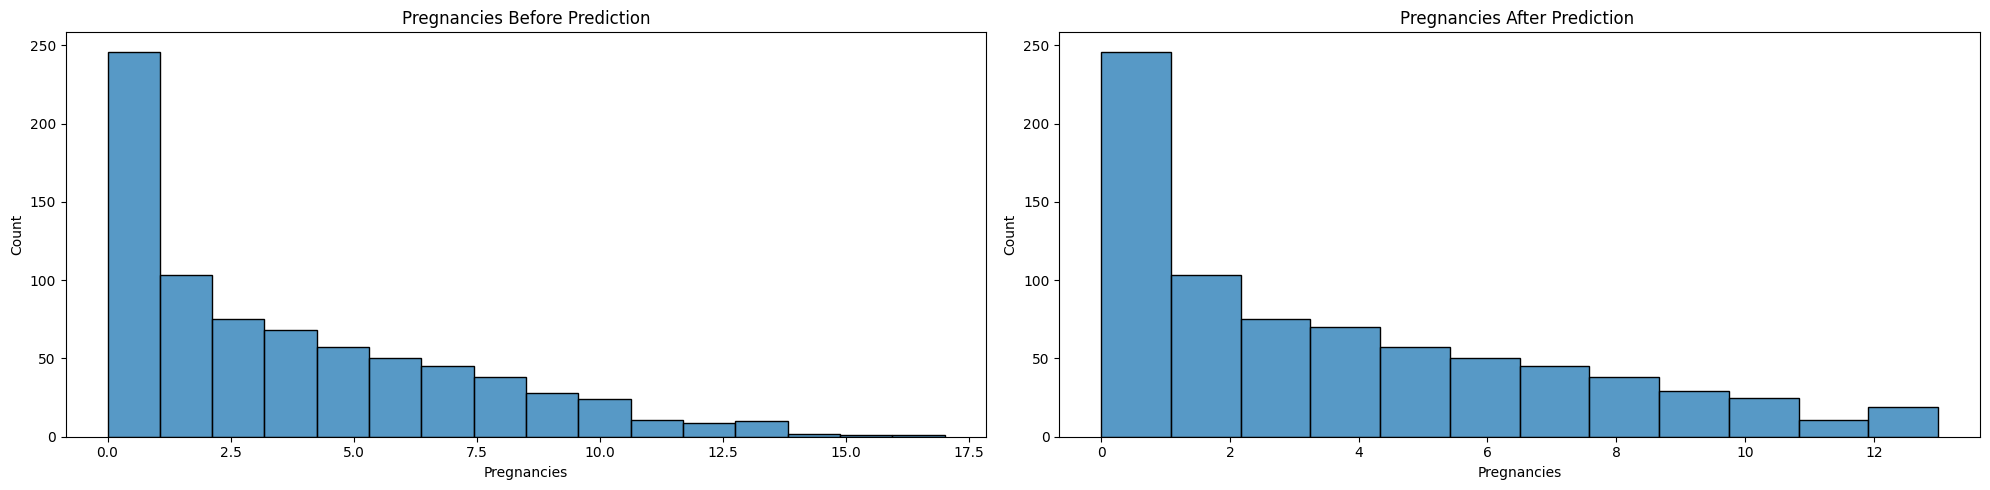

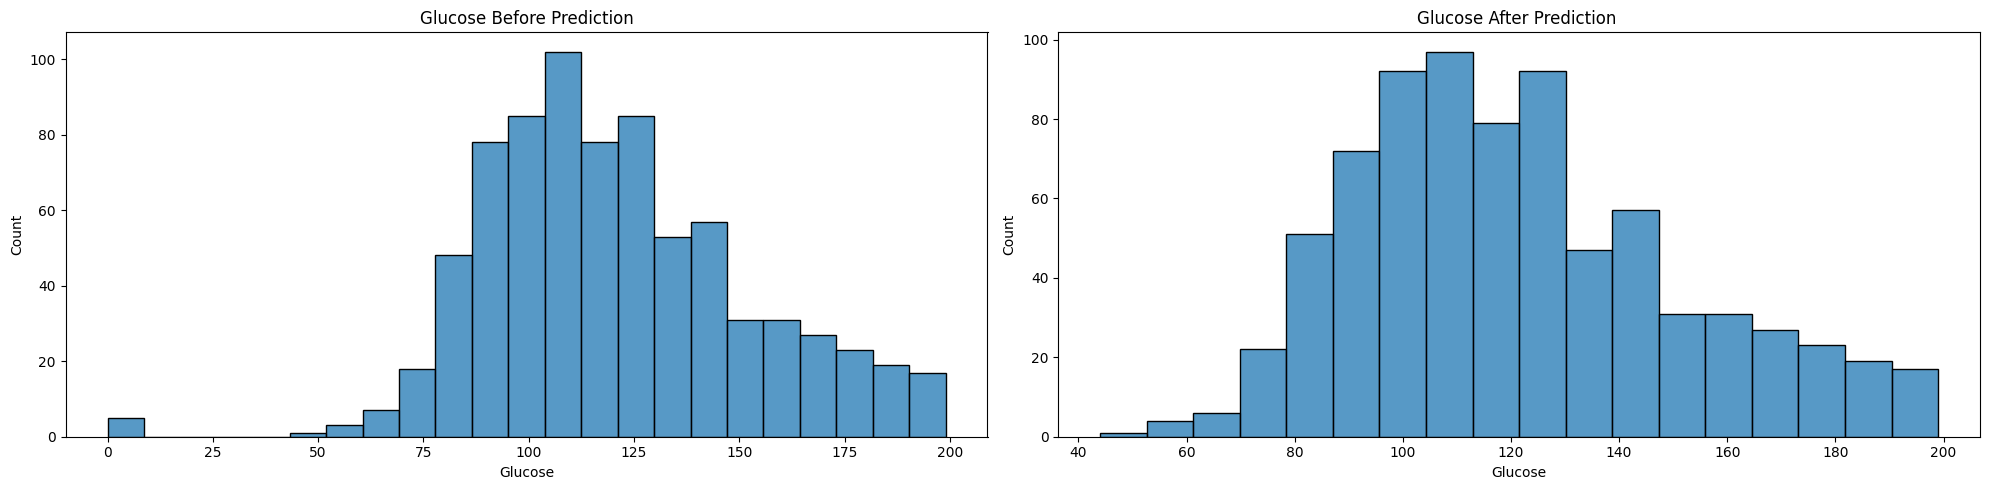

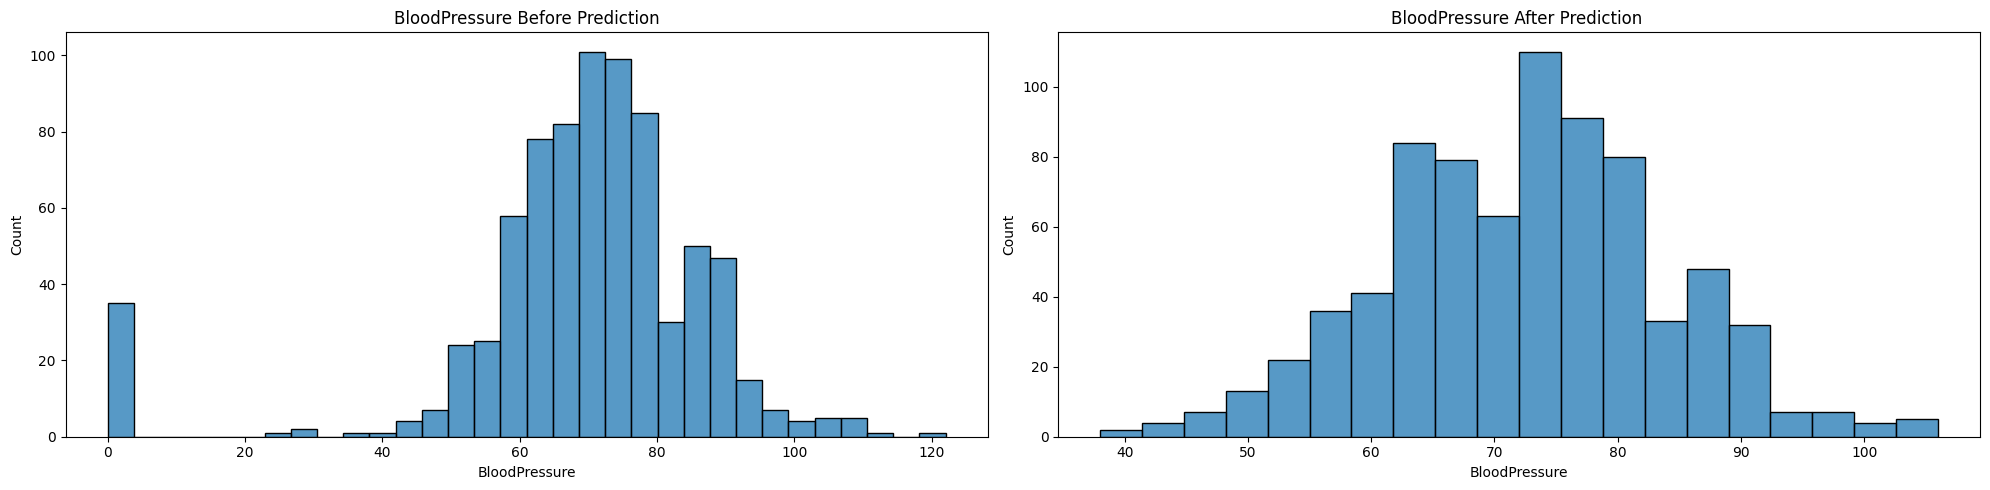

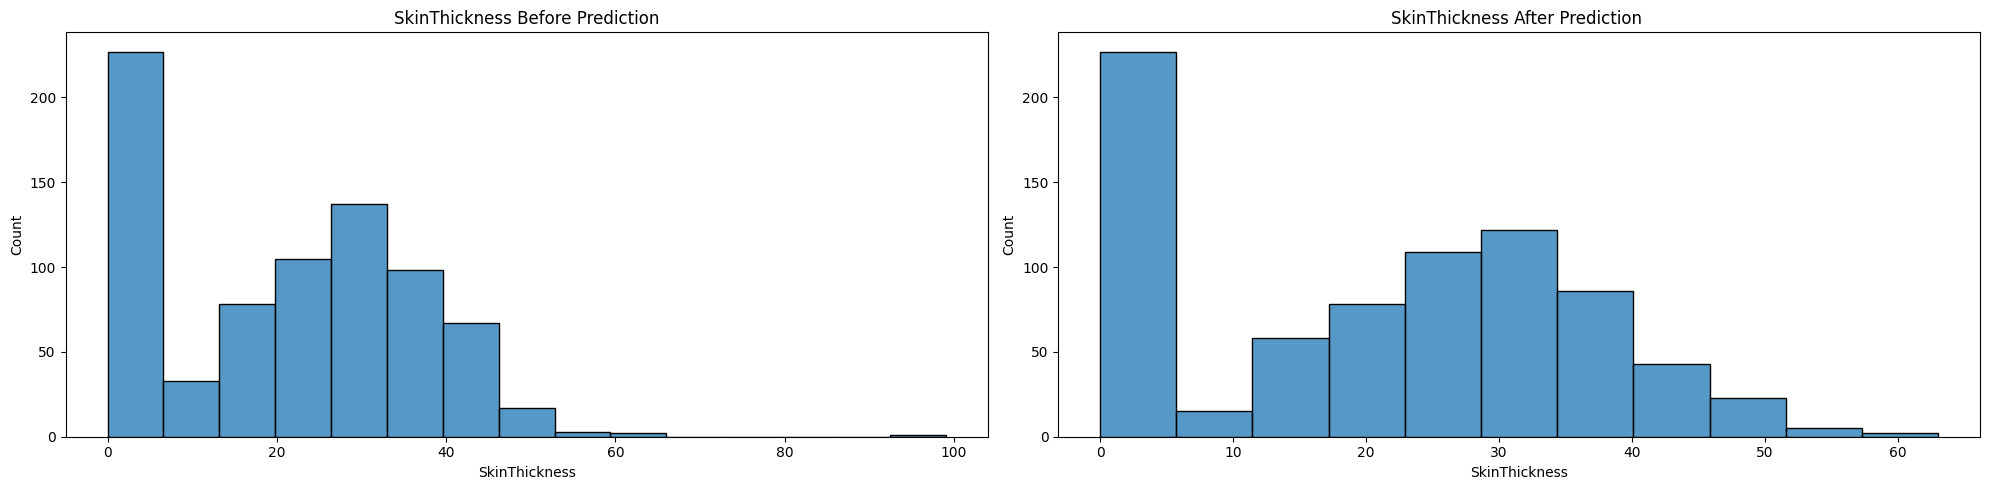

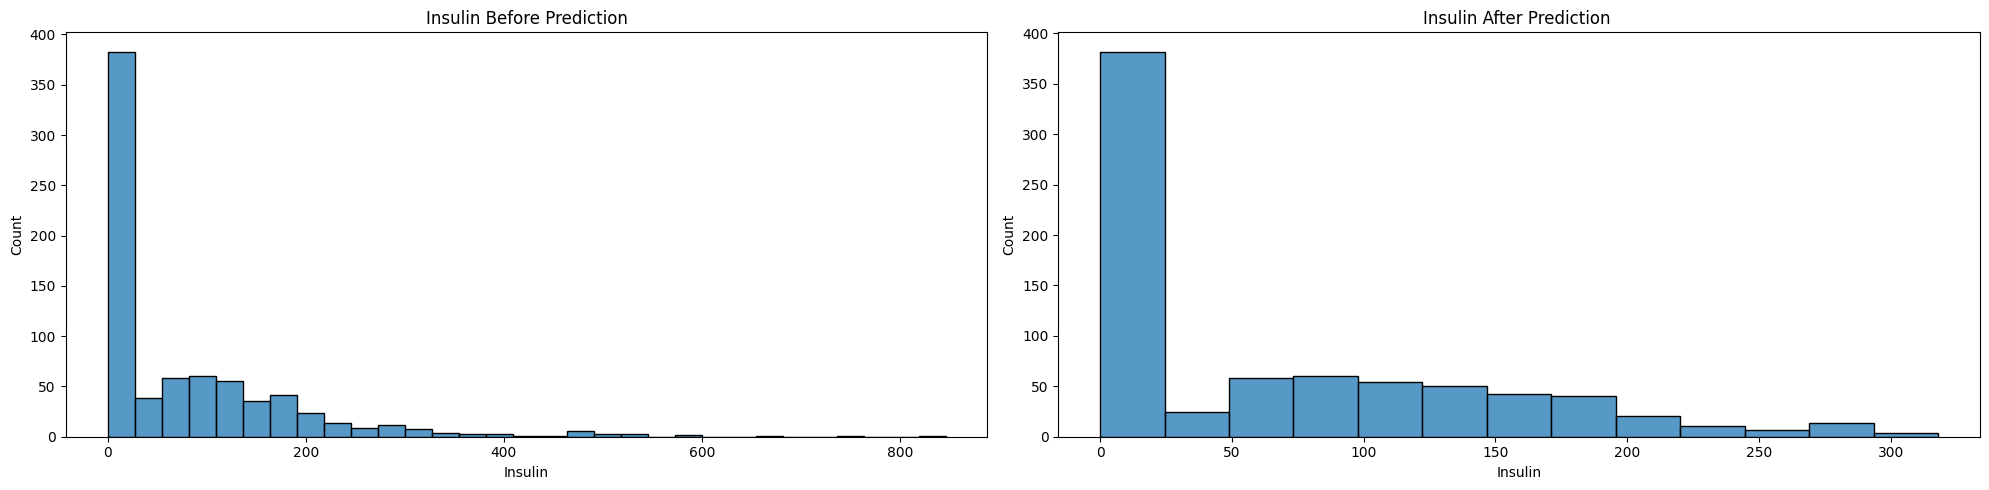

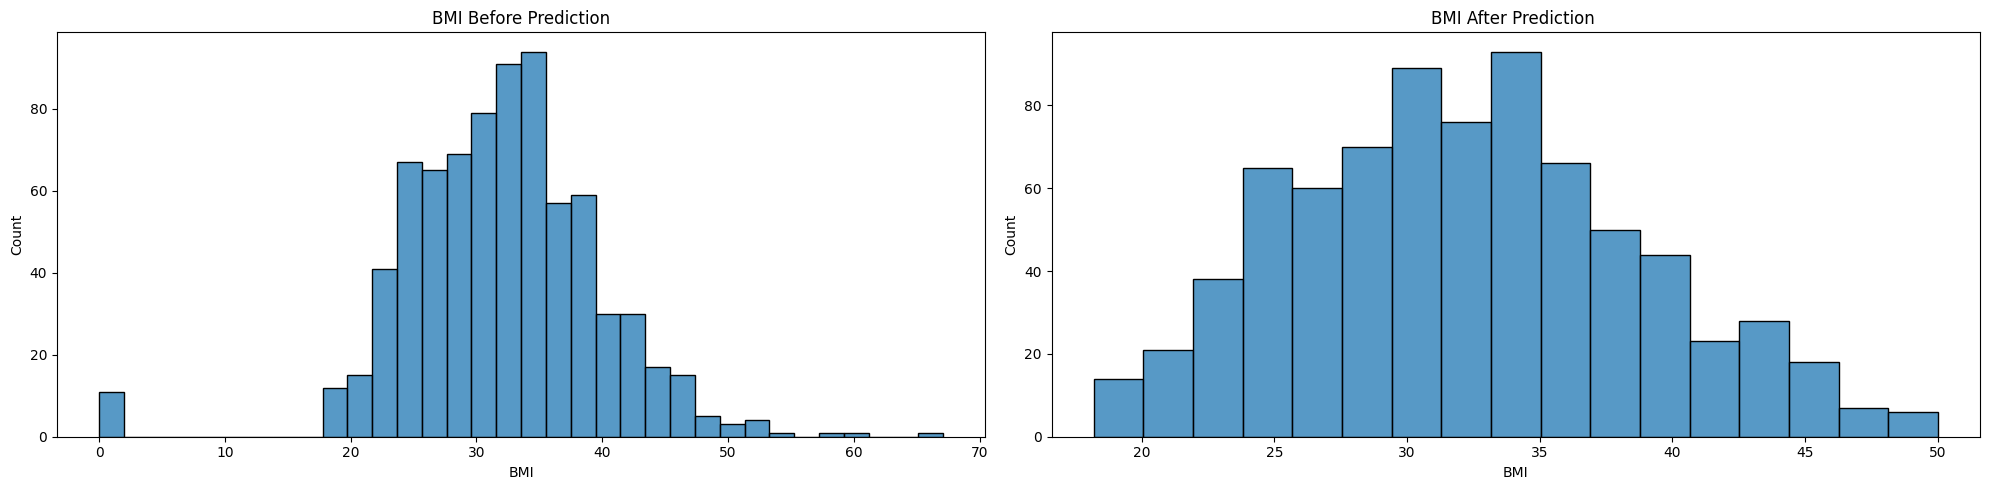

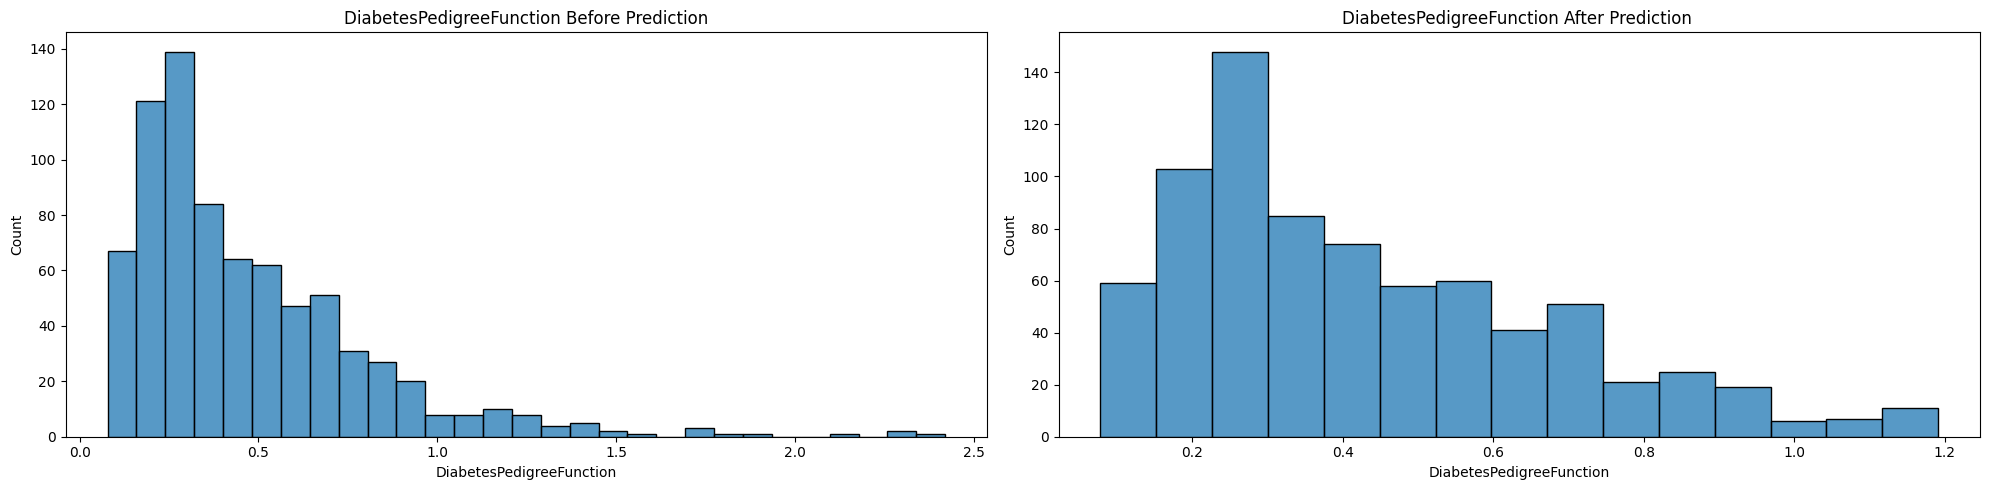

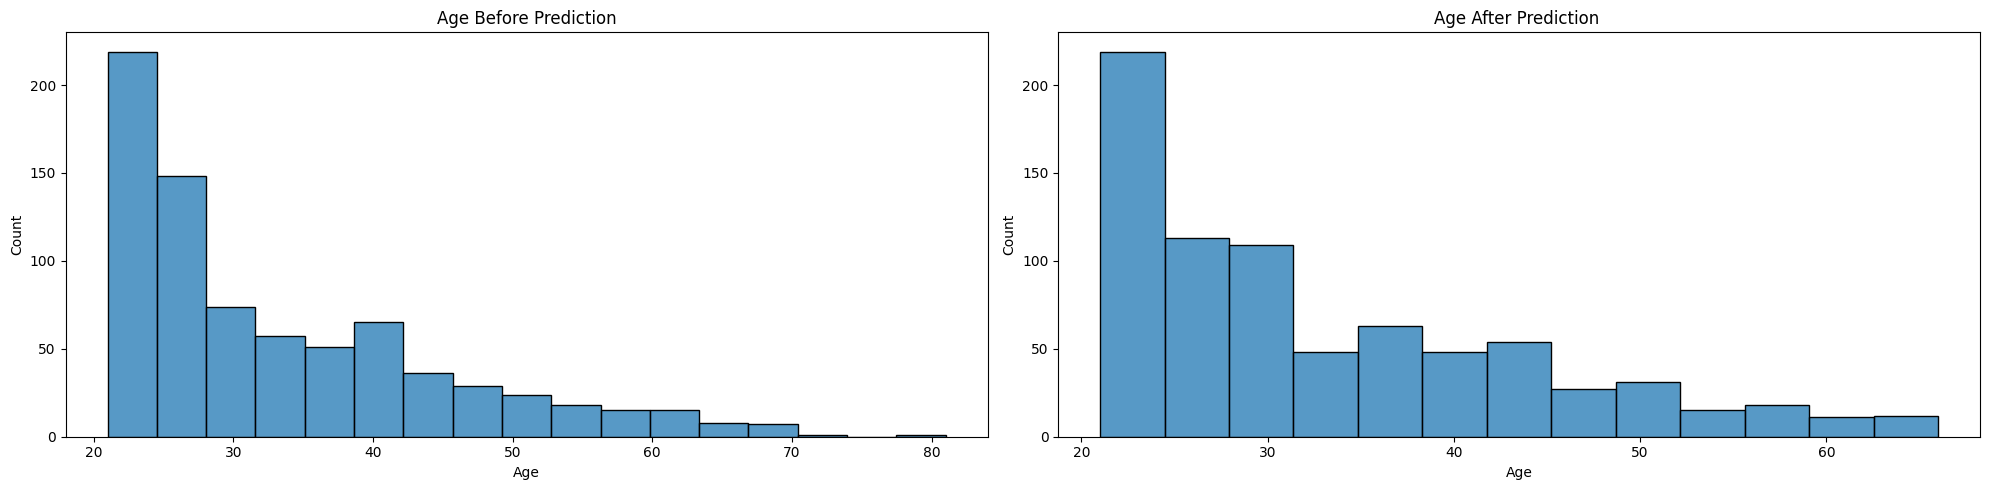

In [41]:
dataframes = [new_df, pred_df]
display_before_after_plot( df_columns, dataframes, sns.histplot, 'Prediction', True )


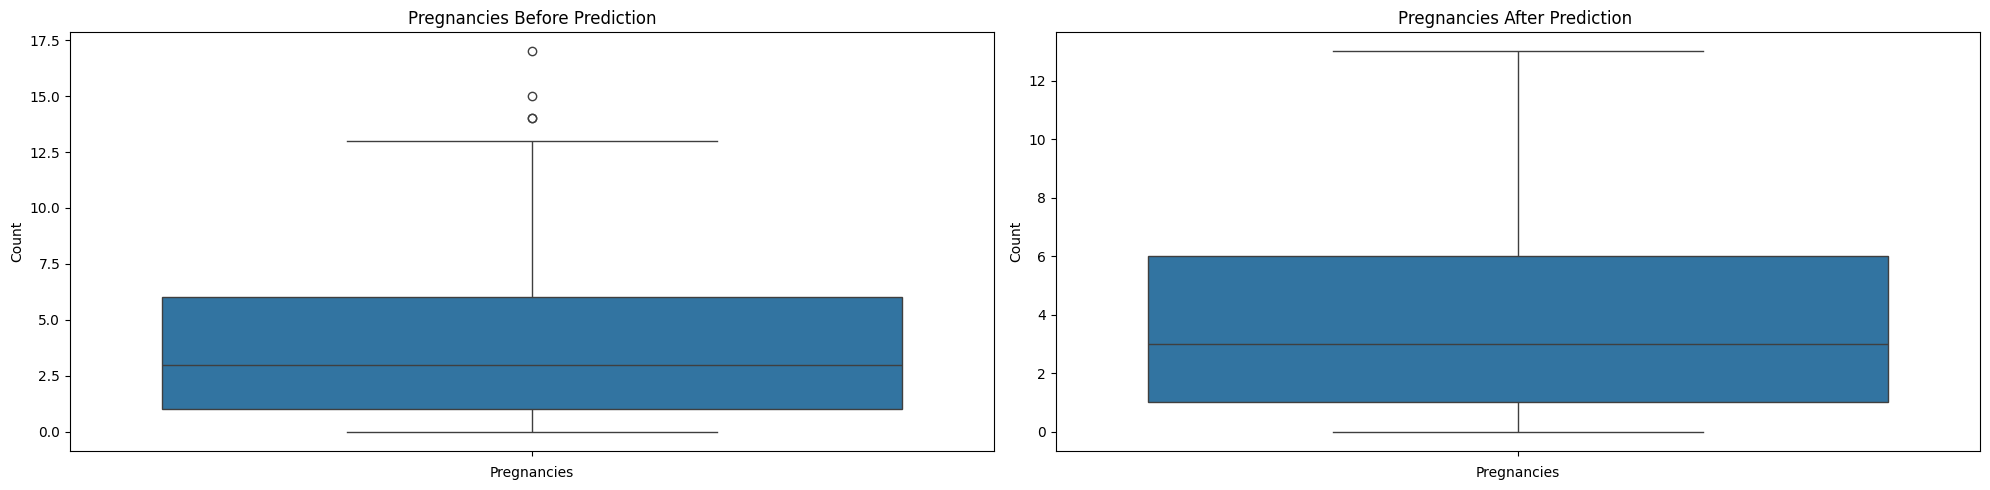

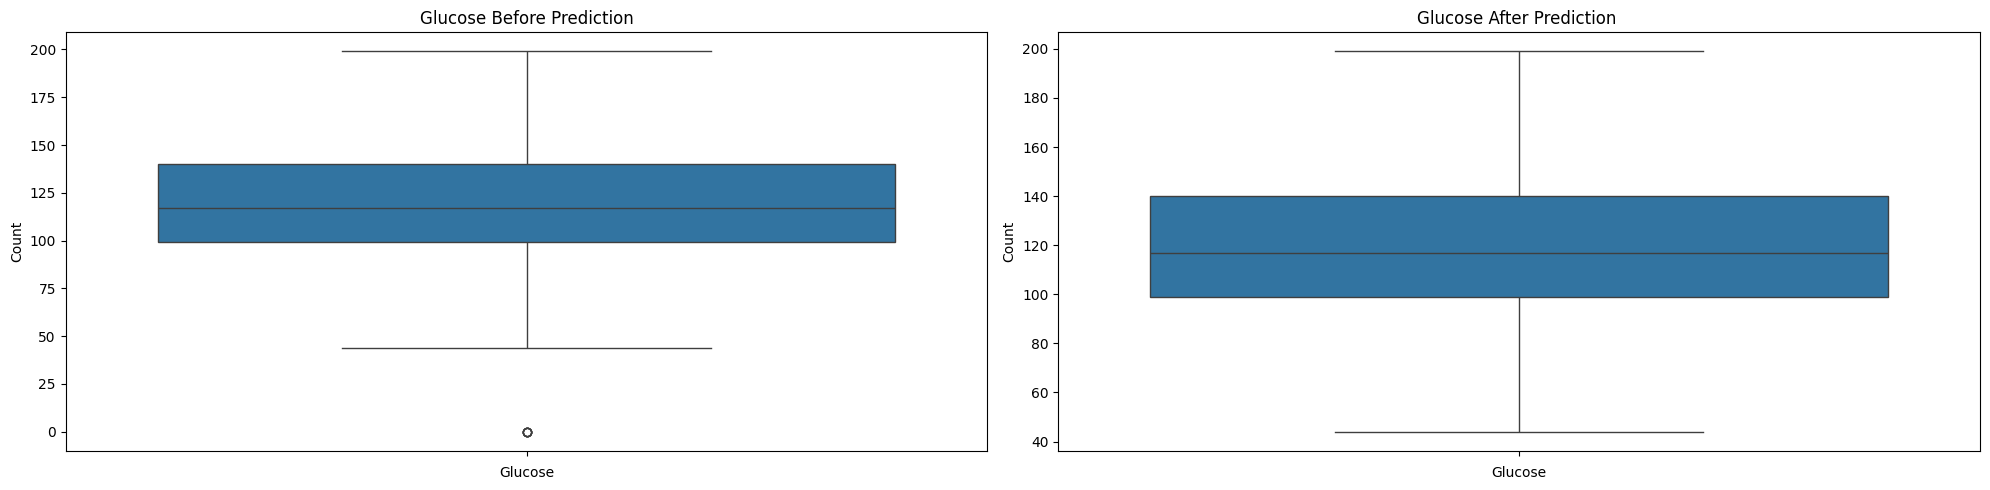

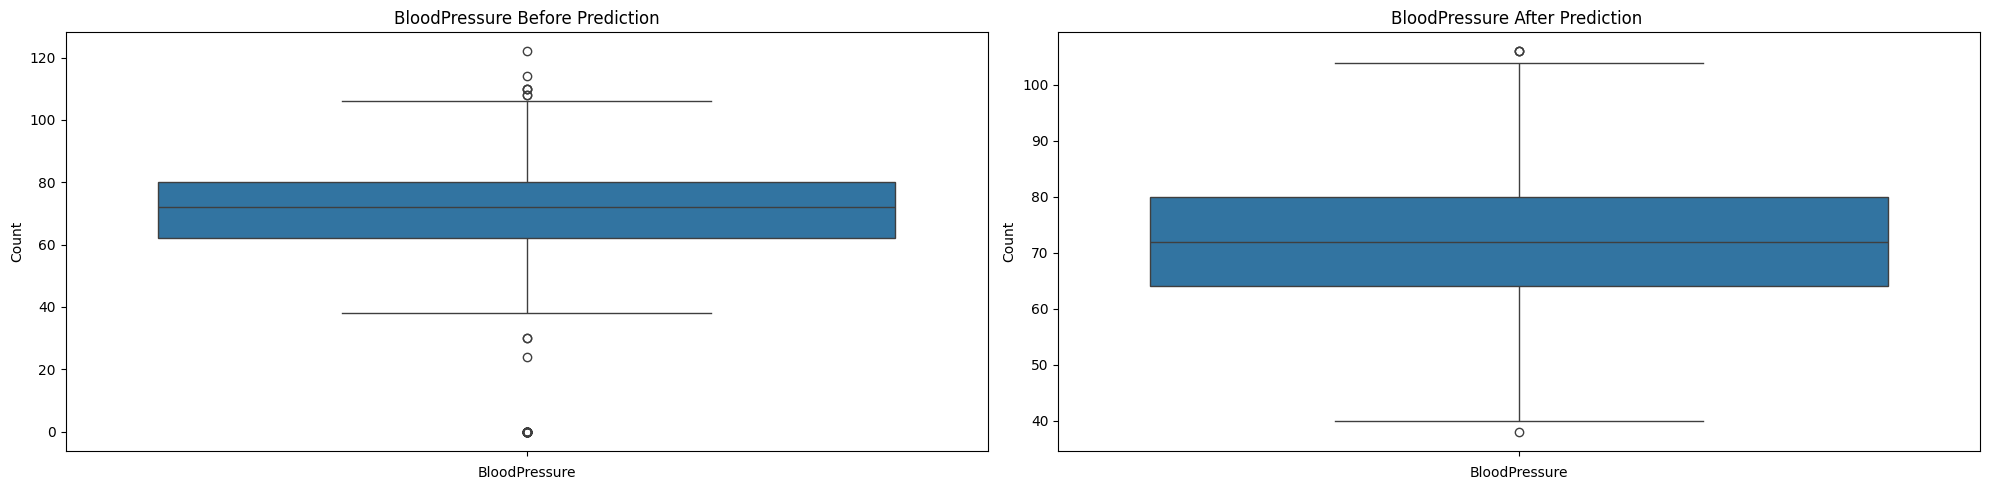

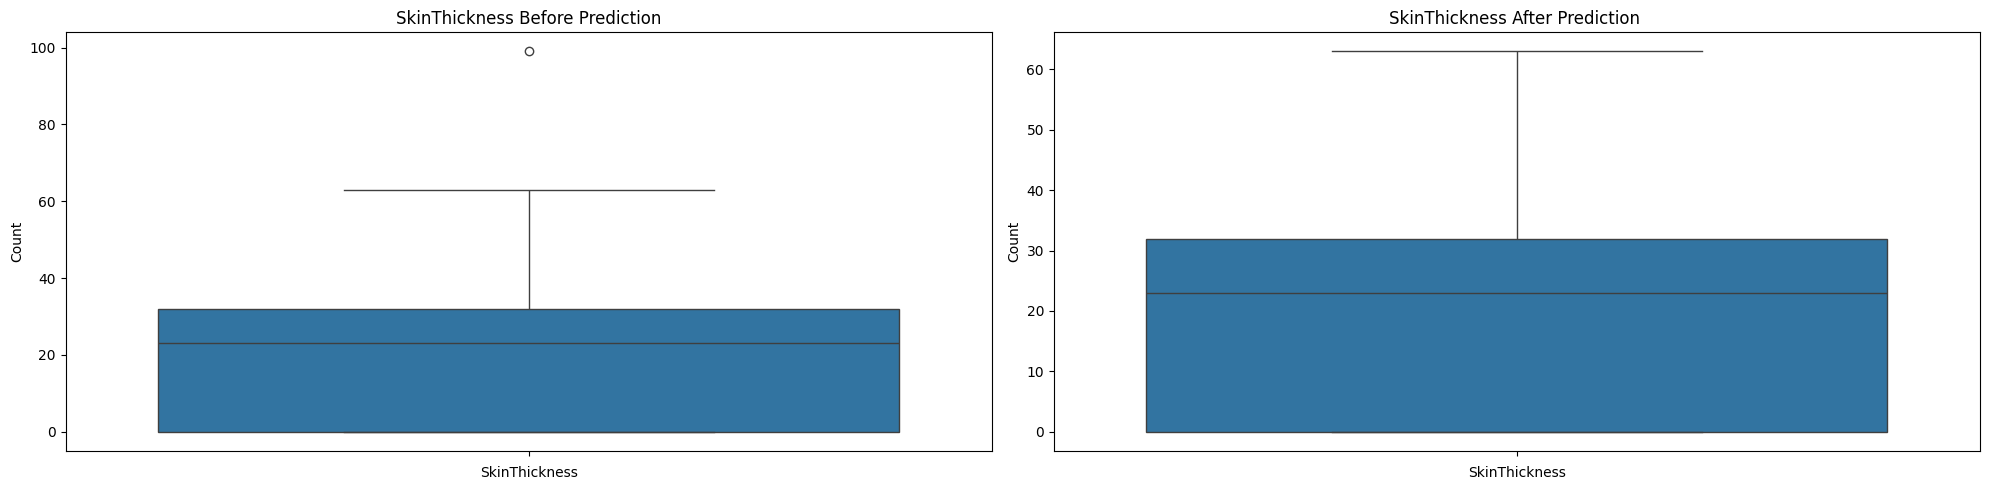

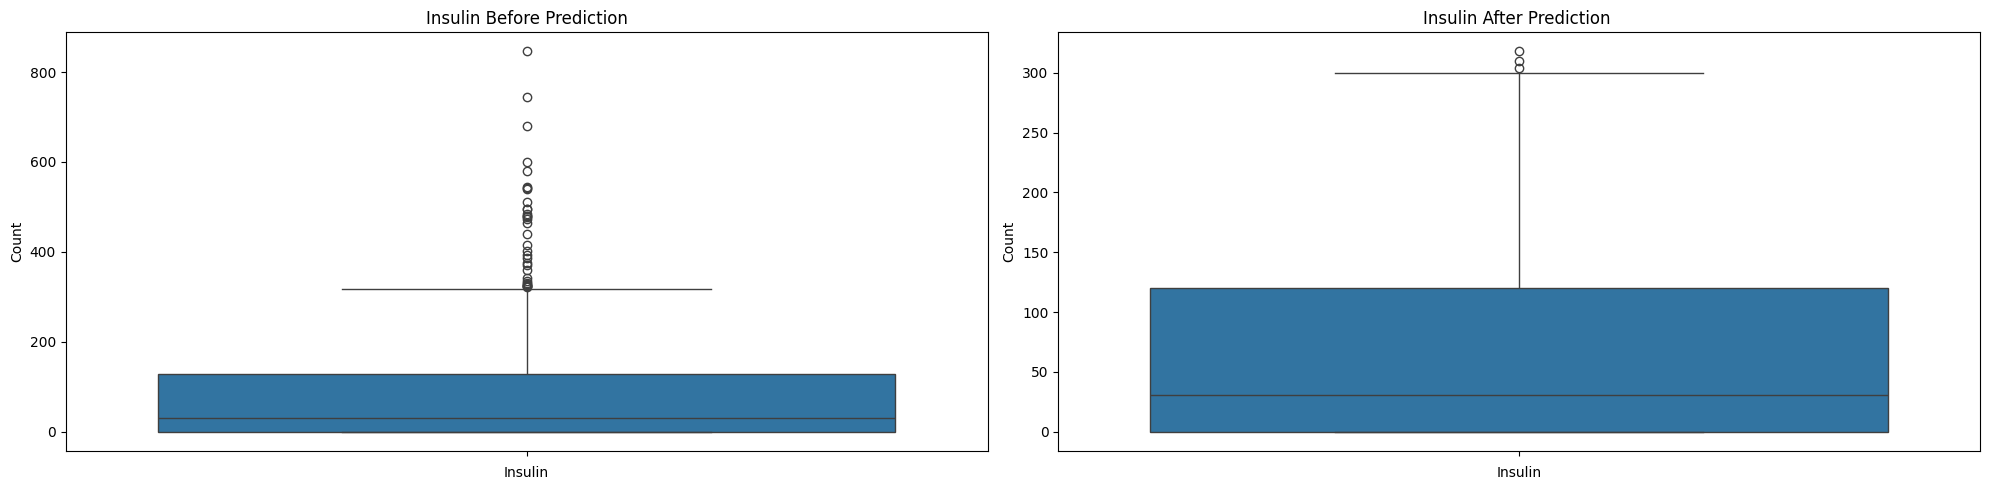

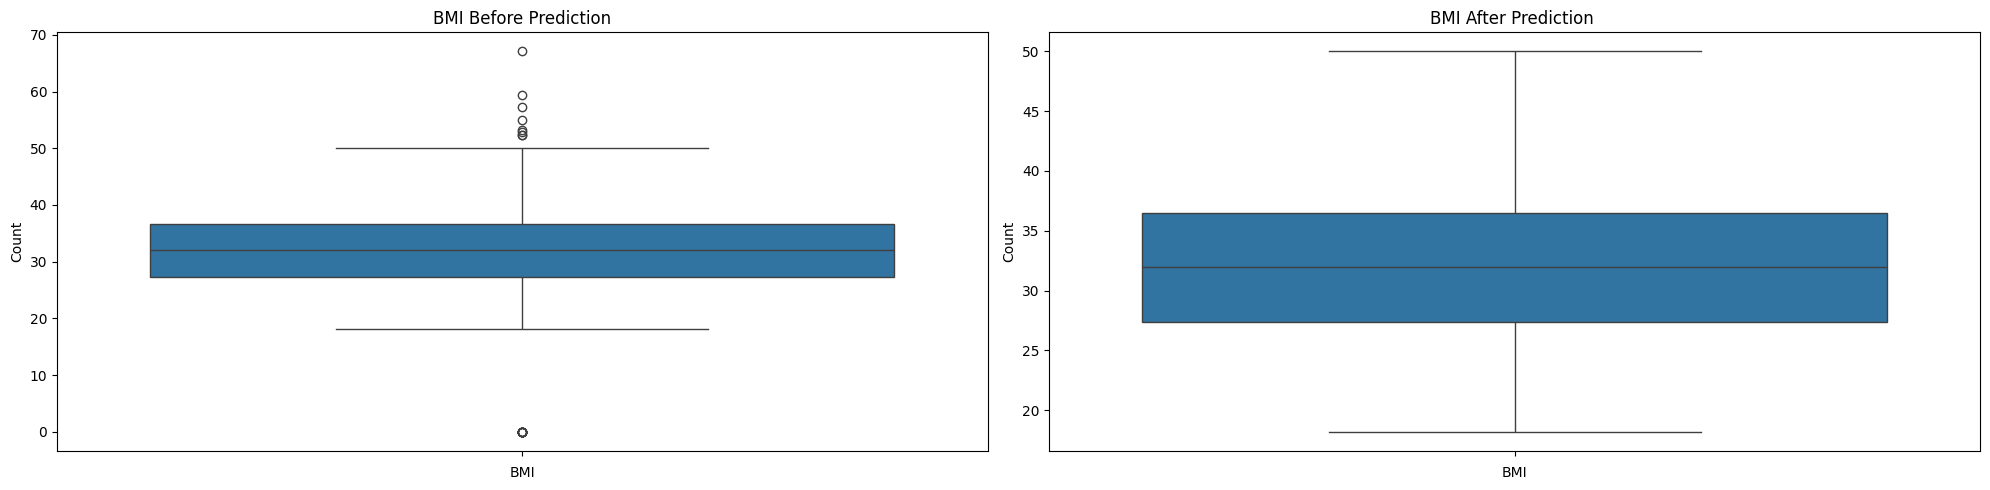

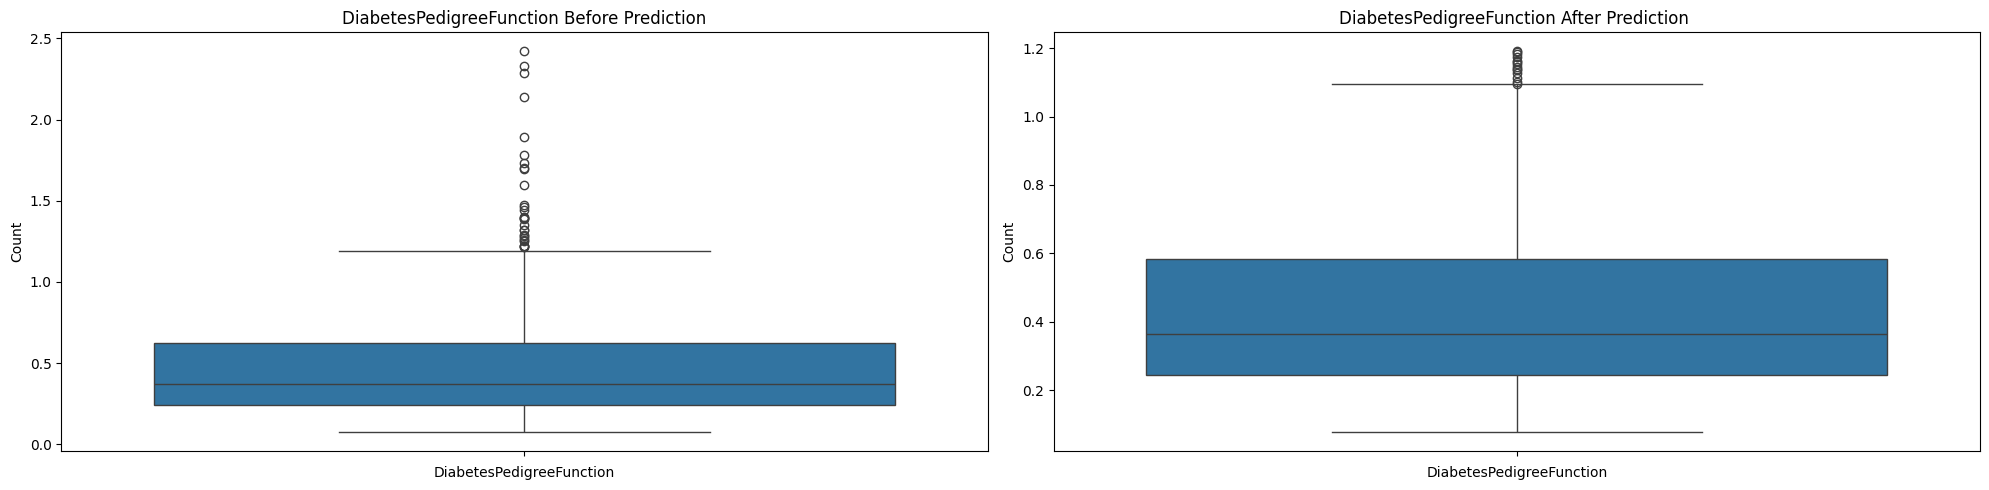

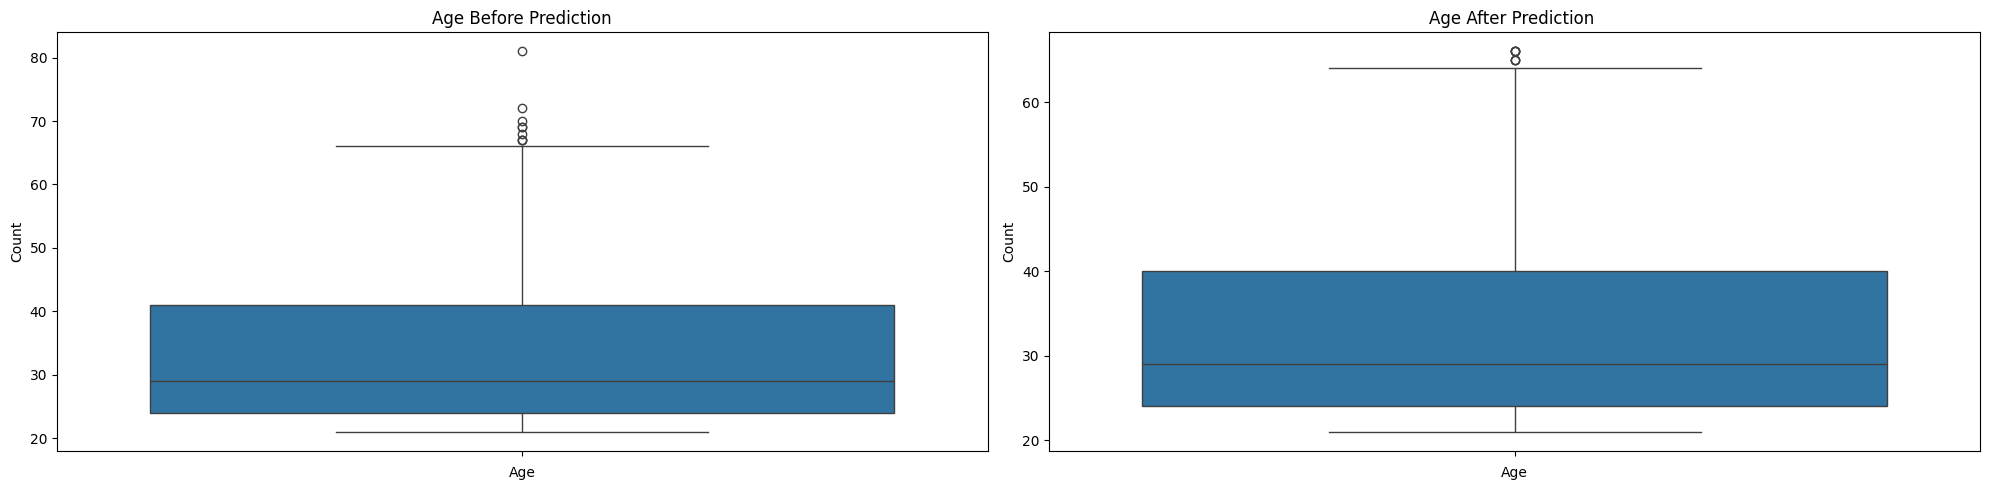

In [42]:
display_before_after_plot( df_columns, dataframes, sns.boxplot, 'Prediction', False )

In [43]:
def display_plot3( columns, dataframes, plot_type, x_axis ):
  for i, col in enumerate( columns ):
    fig, axs = plt.subplots( 1, 3, figsize = (20, 5))
    for j, dataframe in enumerate(dataframes):
      axis_arg = 'x' if x_axis else 'y'
      plot_type(data=dataframe, **{axis_arg: col}, ax=axs[ j ])
      if j == 0:
        axs[j].set_title(f'Origina {col} Feature')
      elif j == 1:
        axs[j].set_title(f'Winsorized {col} Feature')
      else:
        axs[j].set_title(f'Prediction {col} Feature')

      axs[j].set_xlabel(col)
      axs[j].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

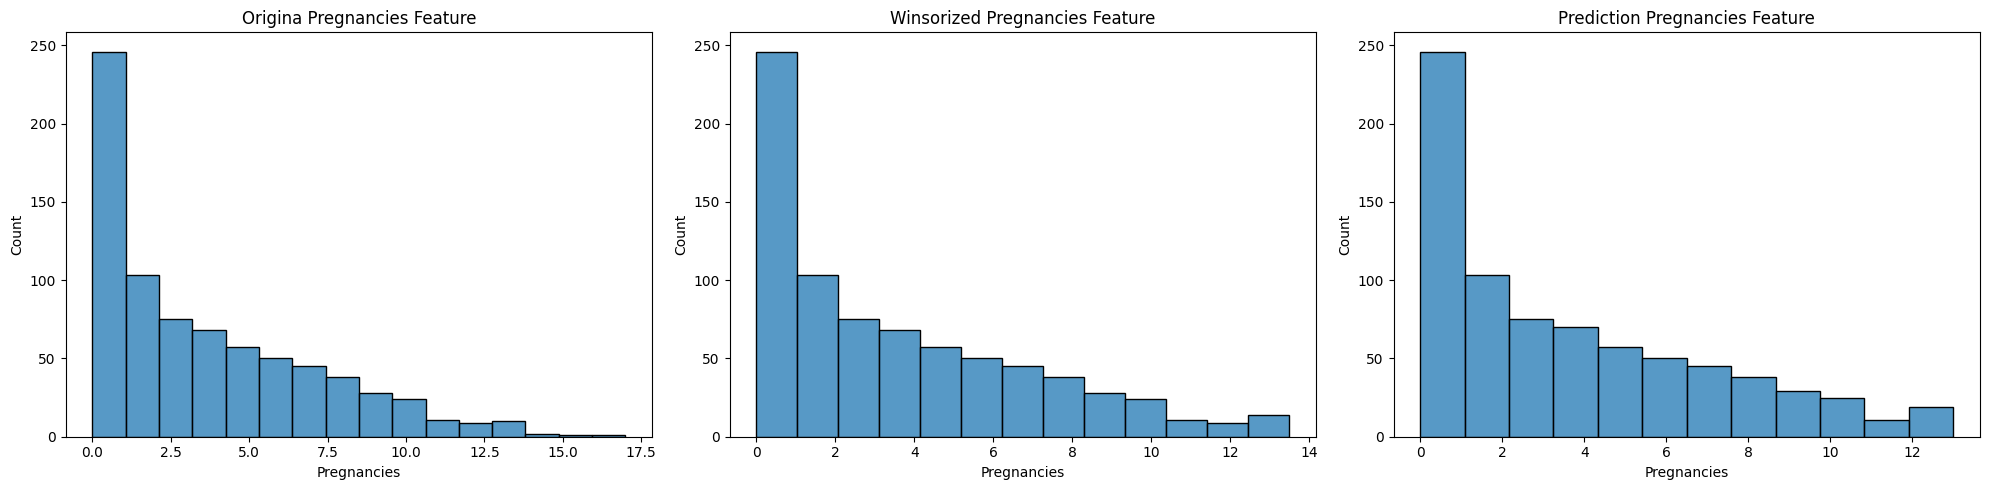

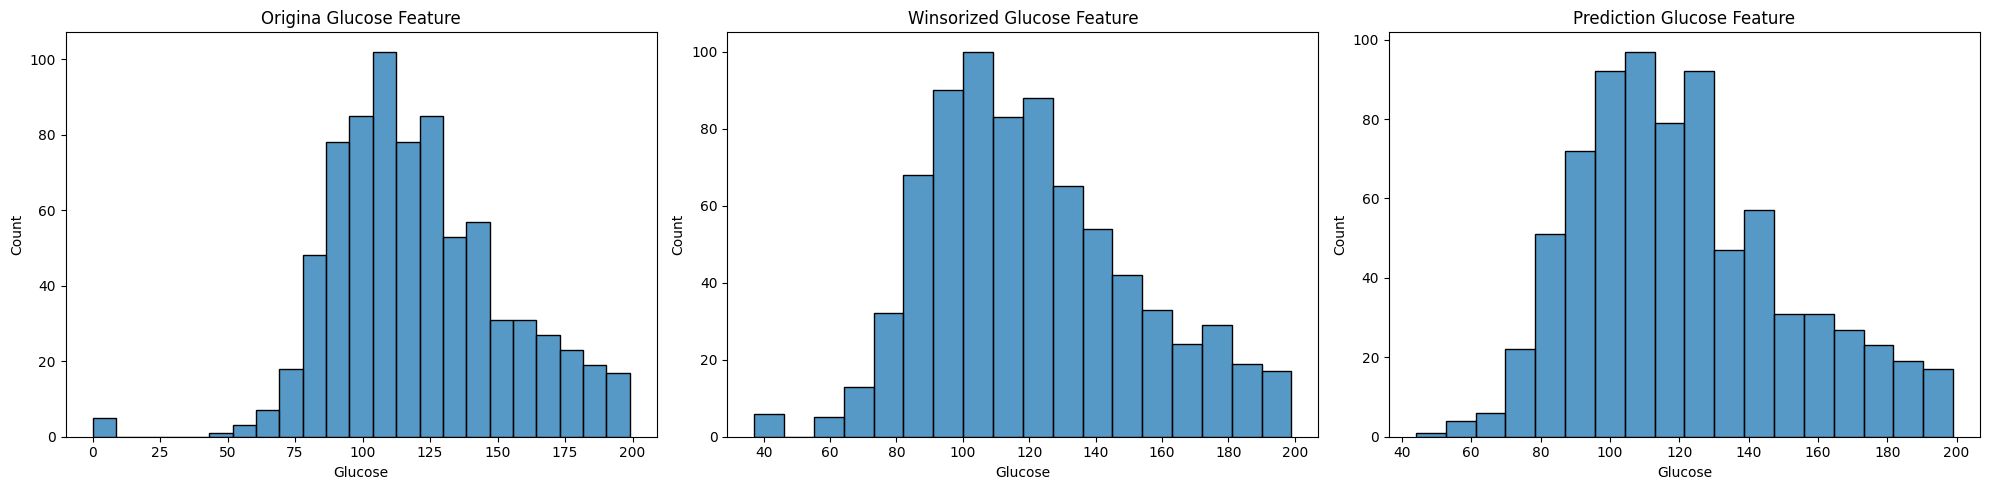

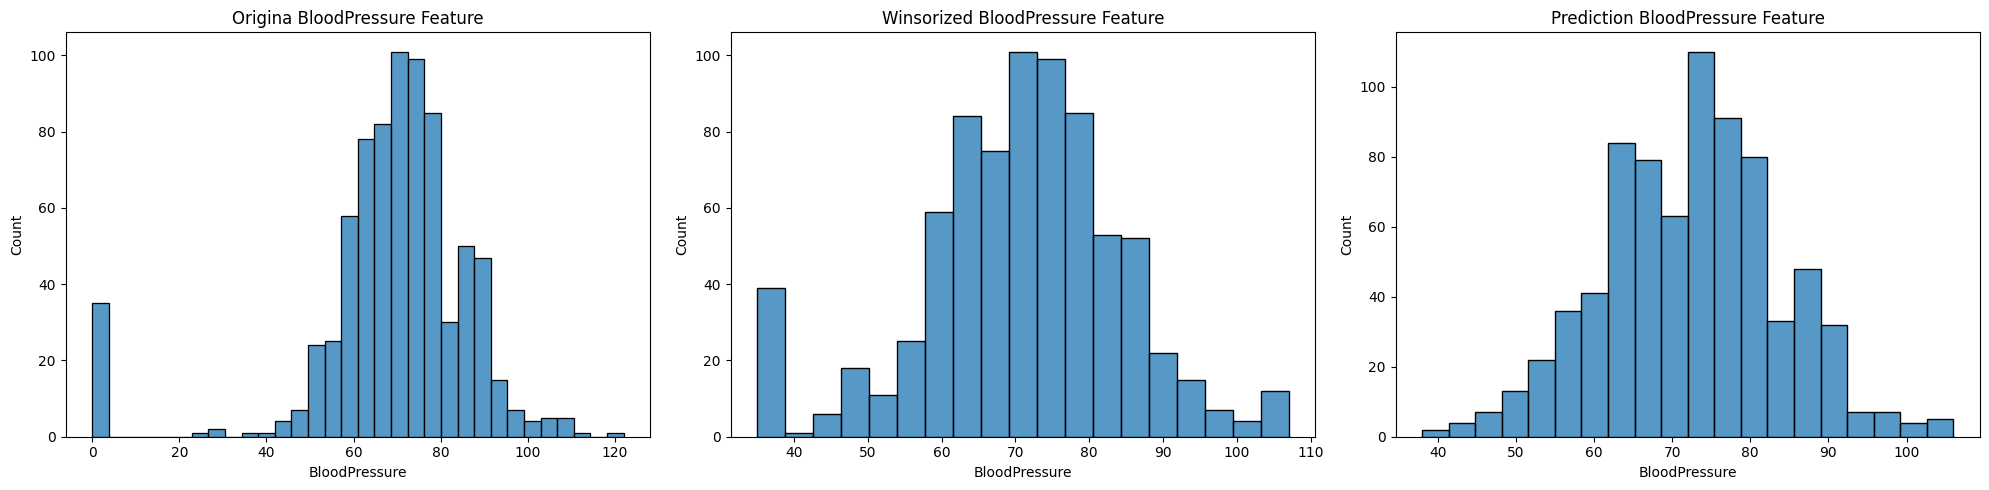

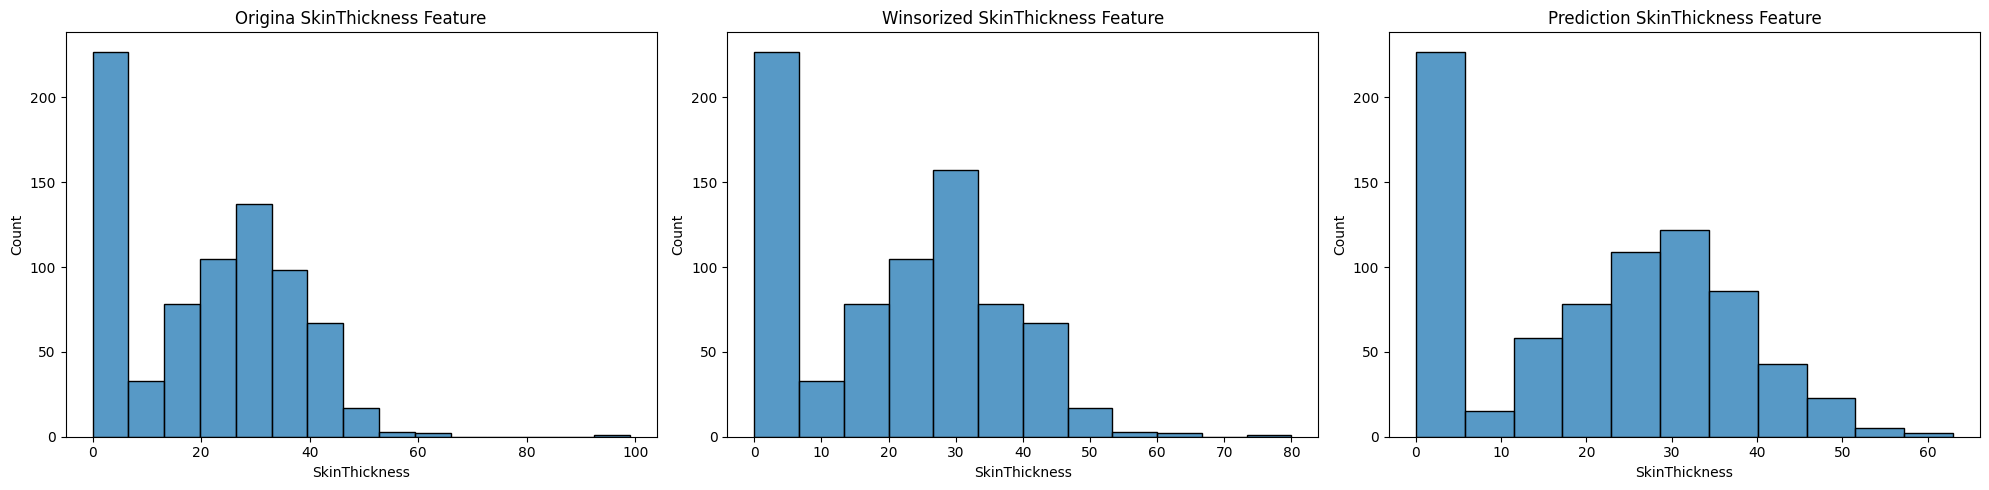

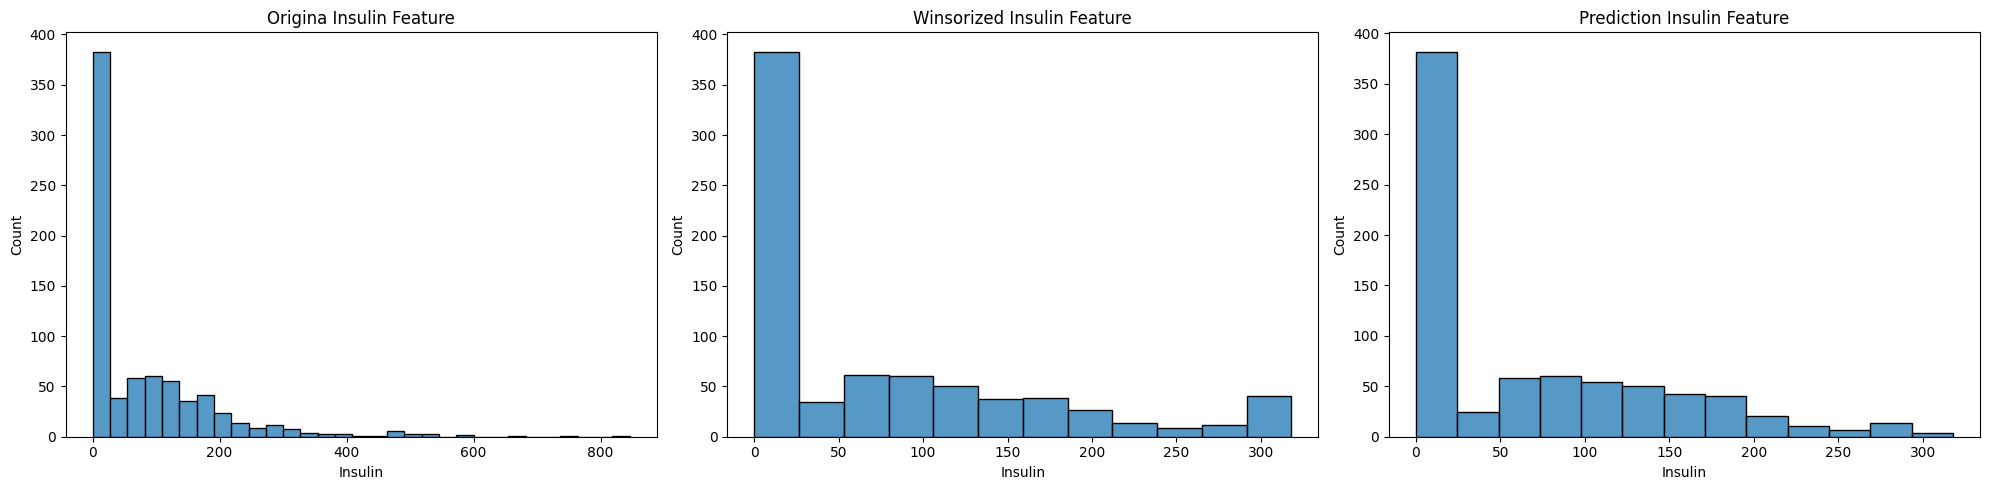

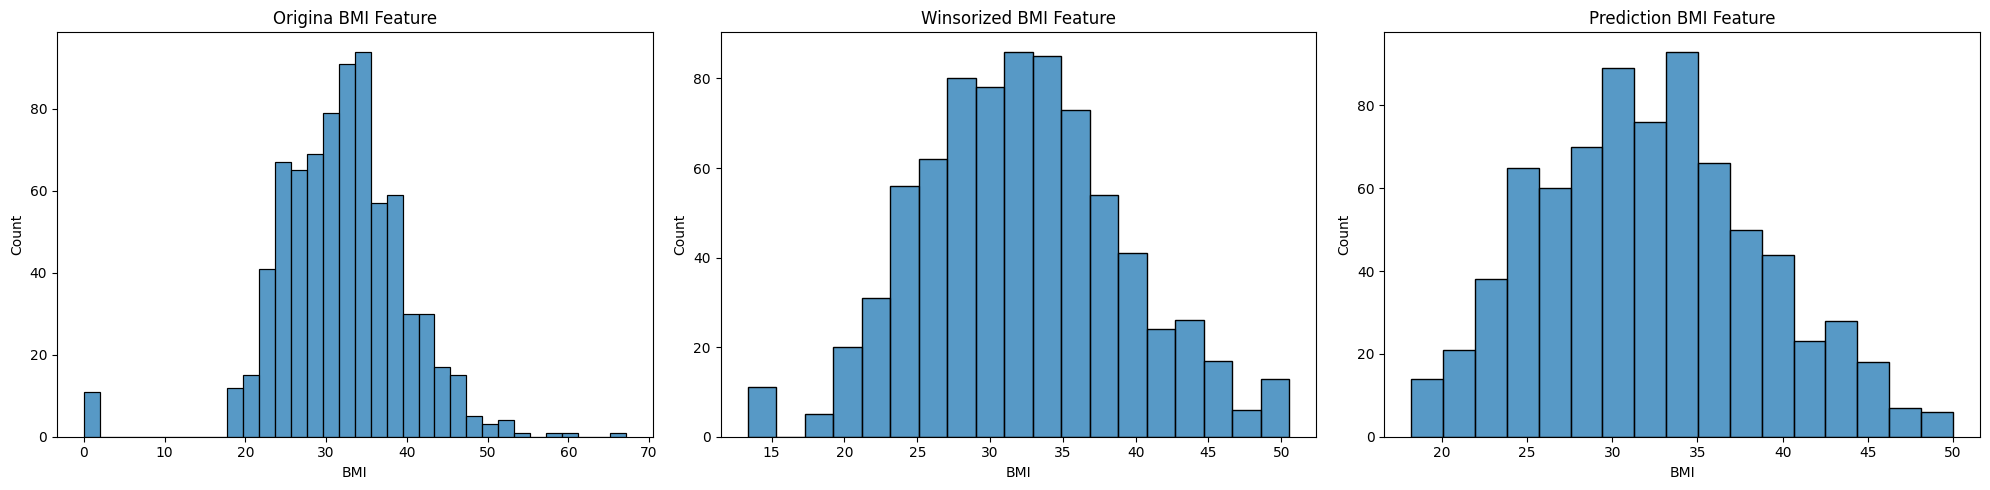

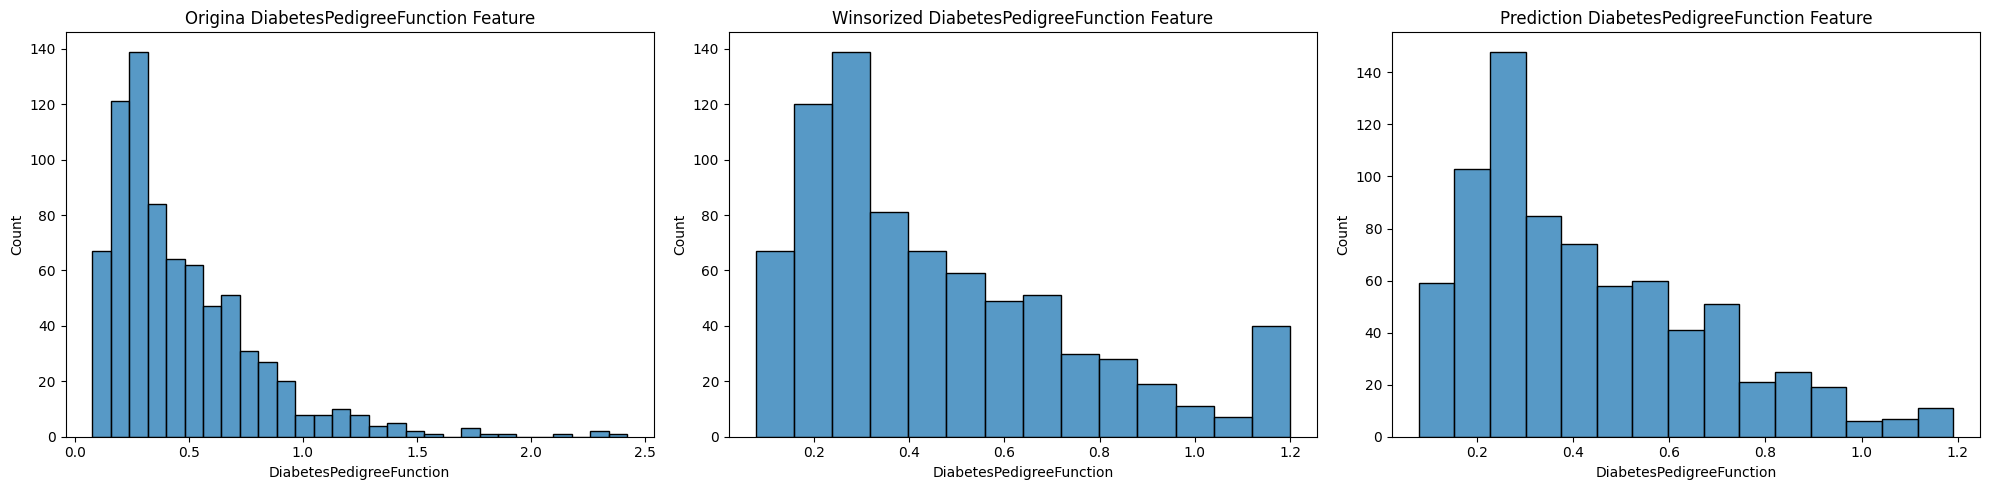

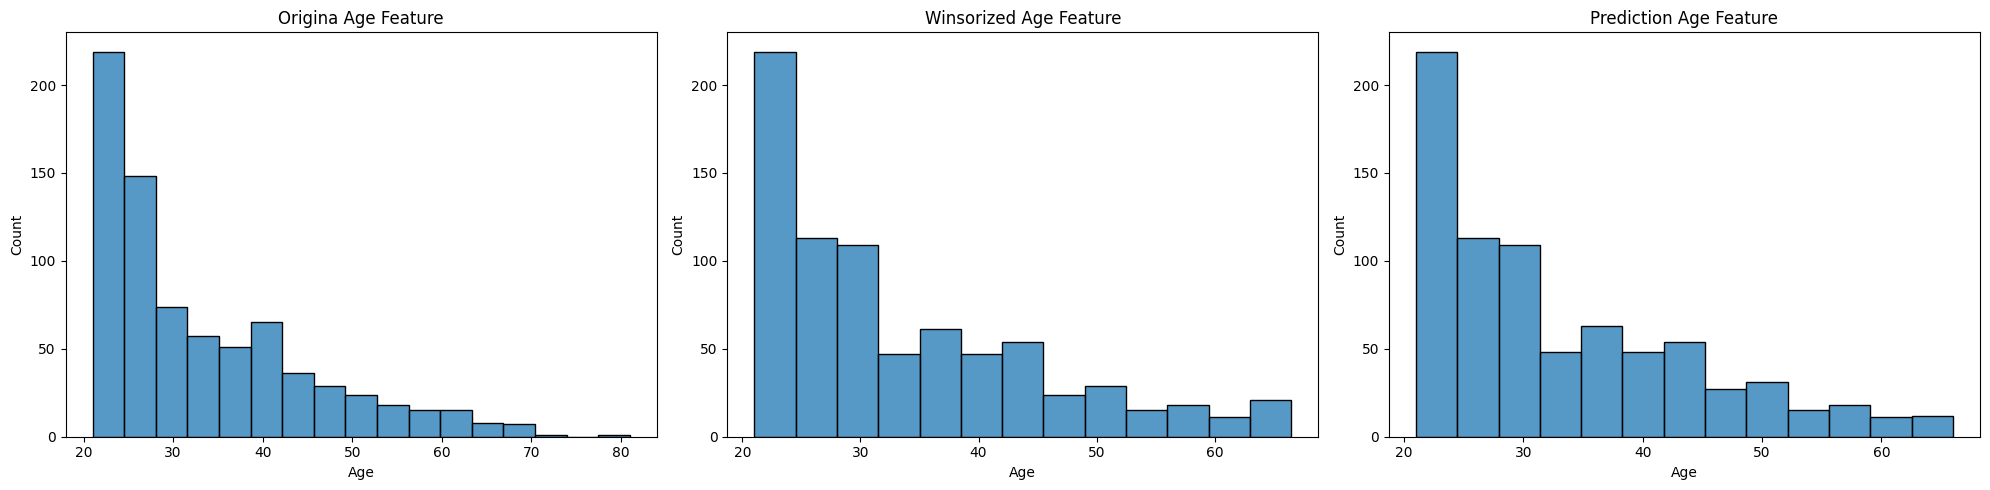

In [44]:
dataframes = [df, winsorized_df, pred_df]
display_plot3( df_columns, dataframes, sns.histplot, True )

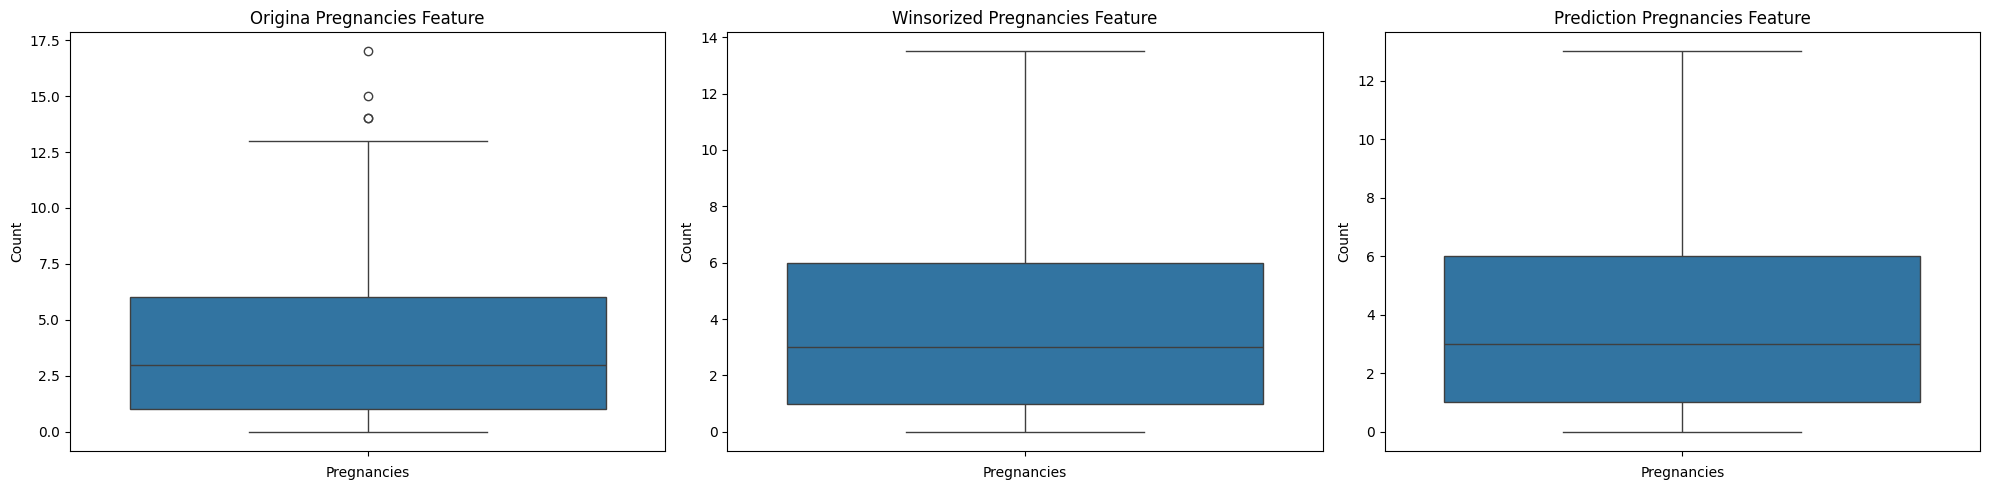

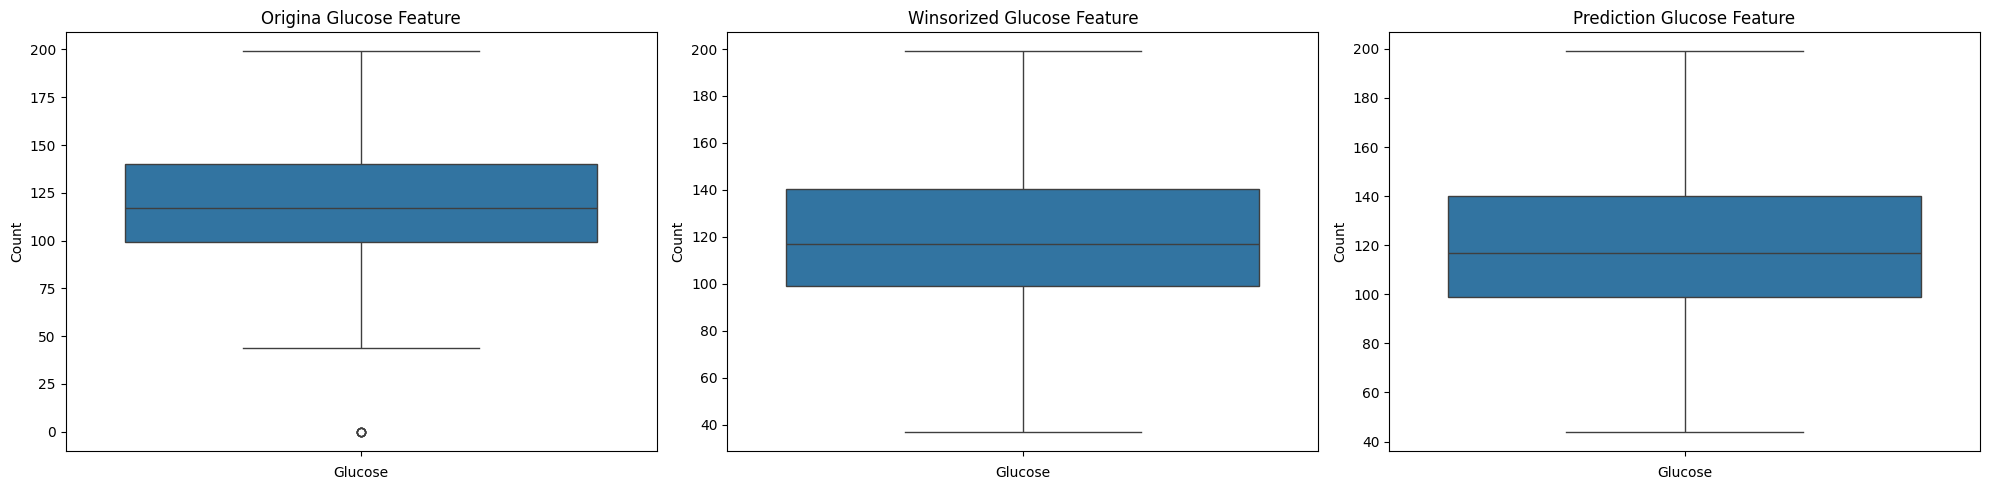

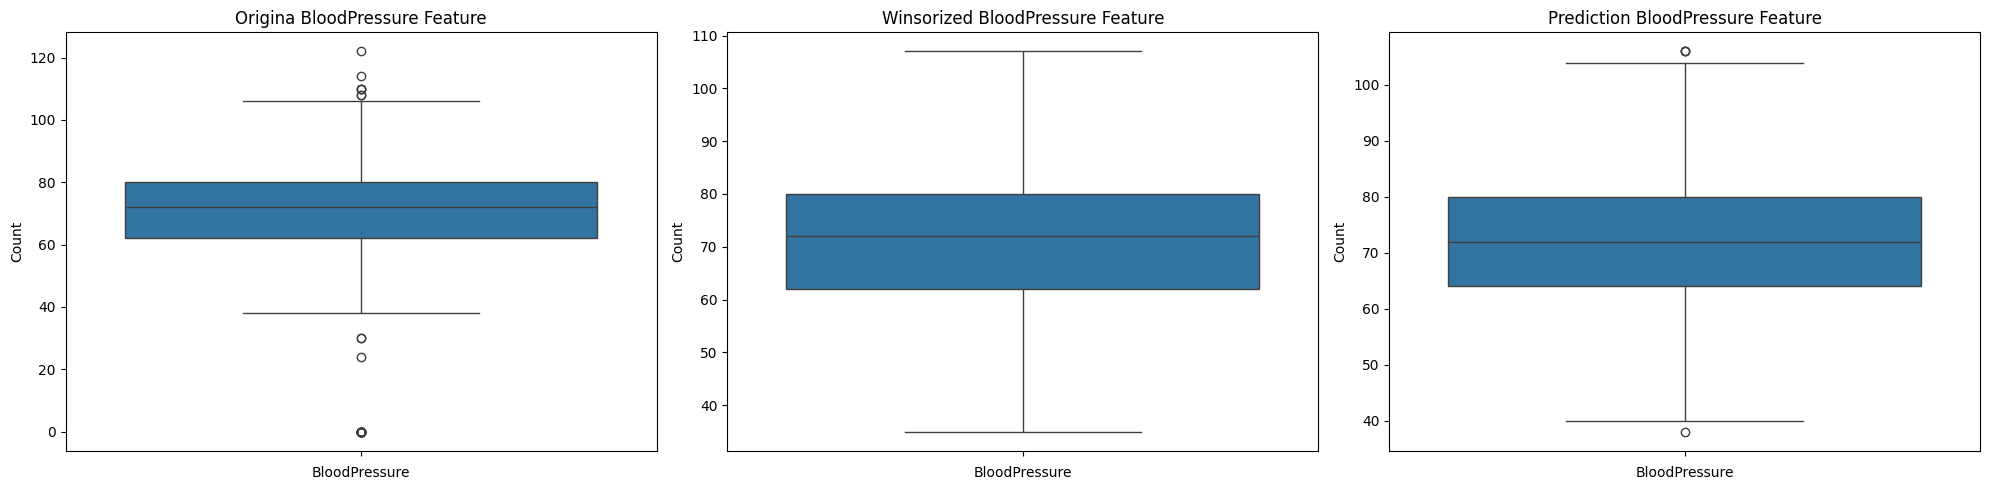

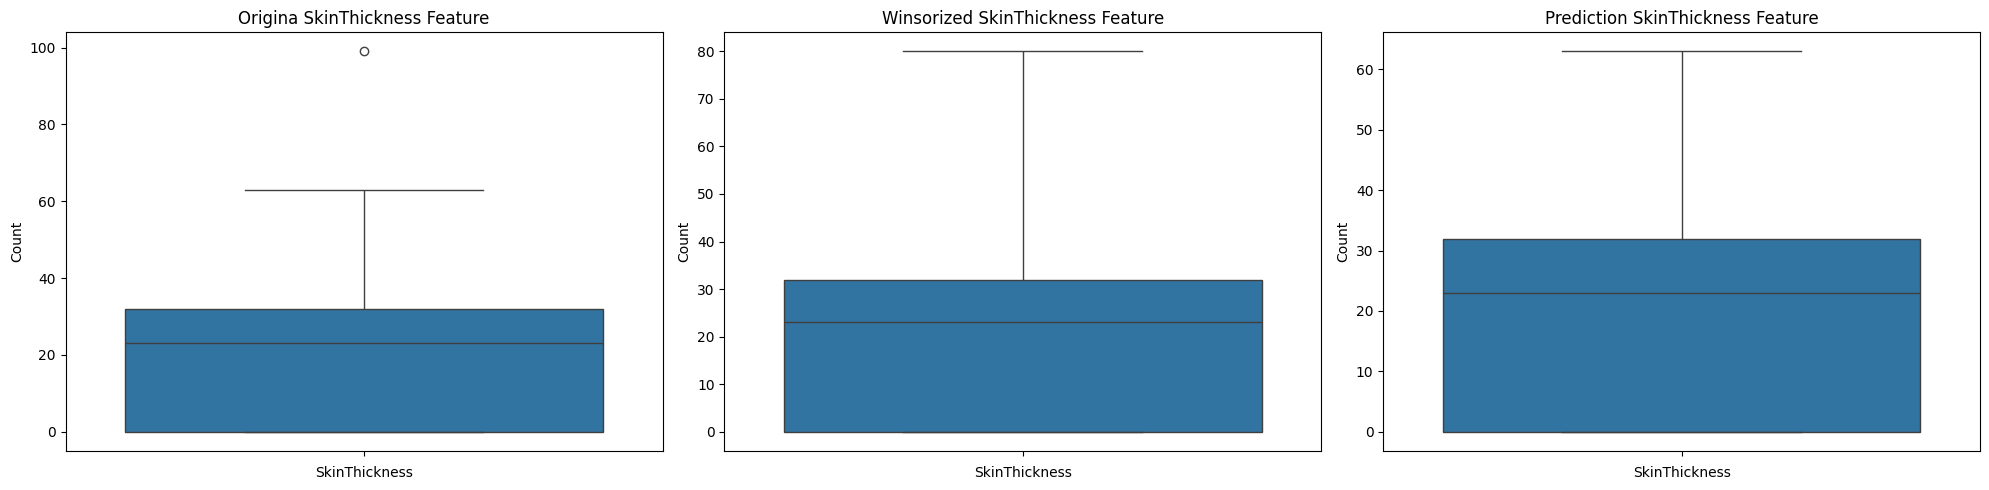

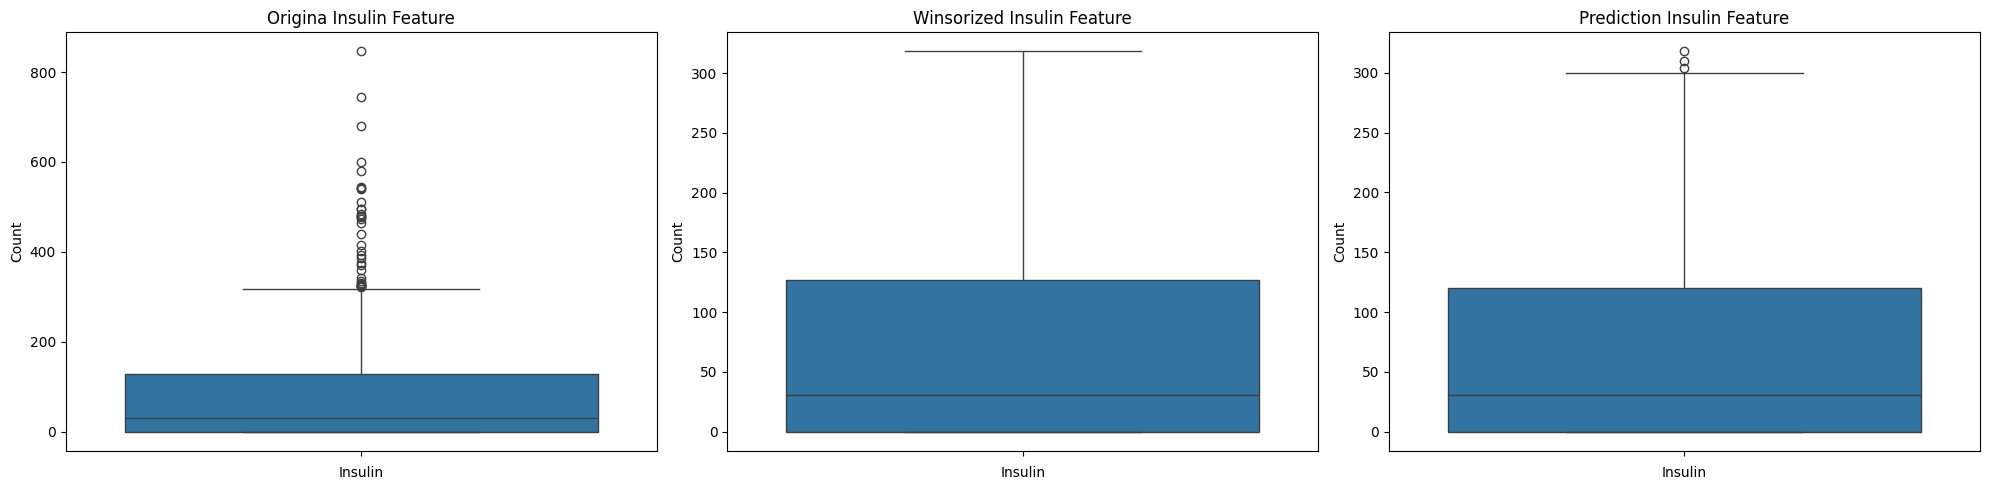

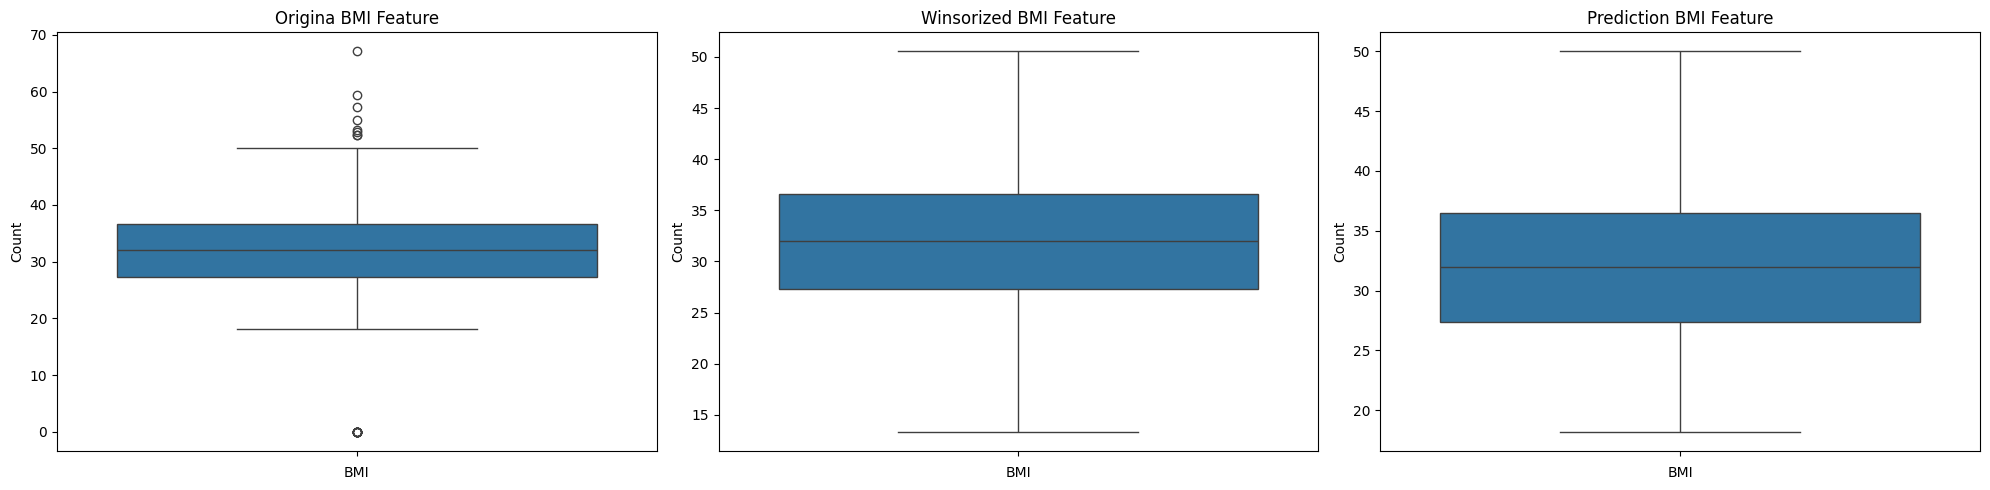

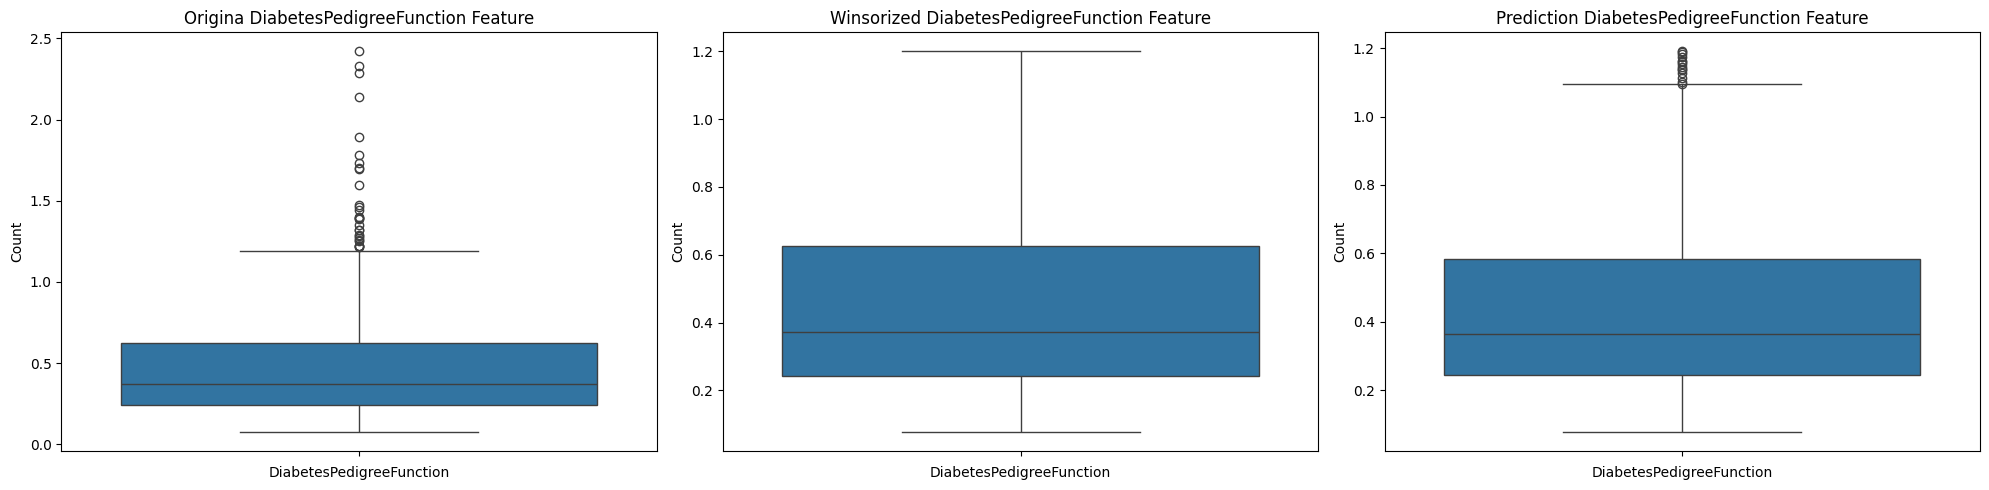

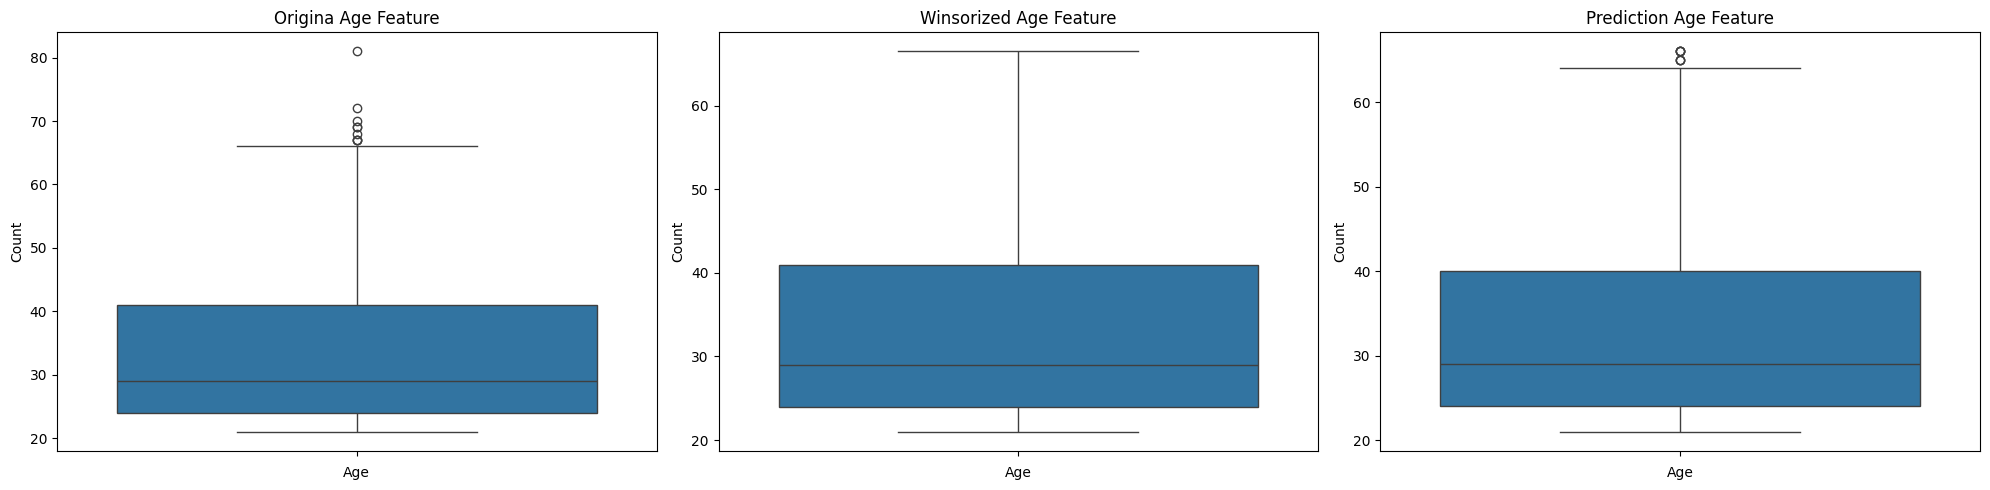

In [45]:
display_plot3( df_columns, dataframes, sns.boxplot, False )